# **Setup & Imports**

In [1]:
# Mount Drive (if your CSV lives in Drive)
from google.colab import drive
drive.mount('/content/drive')

# Install any extras
!pip install --quiet pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm shap optuna imbalanced-learn category_encoders

# Standard libs
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

# Modeling & preprocessing
from sklearn.model_selection   import (
    train_test_split, KFold, cross_val_score,
    RandomizedSearchCV
)
from sklearn.preprocessing     import (
    StandardScaler, OneHotEncoder
)
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.impute            import SimpleImputer
from sklearn.feature_selection import SelectFromModel

# Regressors & classifiers
from sklearn.linear_model      import Ridge, Lasso, ElasticNet
from sklearn.ensemble          import RandomForestRegressor, RandomForestClassifier, StackingRegressor, StackingClassifier
from xgboost                   import XGBRegressor, XGBClassifier
from lightgbm                  import LGBMRegressor, LGBMClassifier

# Metrics
from sklearn.metrics           import (
    r2_score, mean_absolute_error, mean_squared_error,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score
)

# Imbalance handling & encoding
from imblearn.over_sampling    import SMOTE
import category_encoders as ce

# Interpretability
import shap


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load & Inspect the Data**

In [2]:
from google.colab import drive
import pandas as pd

# 1. Mount Drive
drive.mount('/content/drive')

# 2. Point to the exact path in your Drive
path = '/content/drive/MyDrive/career_success.csv'
df = pd.read_csv(path)

print("✅ Shape:", df.shape)
display(df.head())
df.info()
display(df.describe(include='all').T)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Shape: (5000, 20)


,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   High_School_GPA        5000 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  5000 non-null   int64  
 9   Projects_Completed     5000 non-null   int64  
 10  Certifications         5000 non-null   int64  
 11  Soft_Skills_Score      5000 non-null   int64  
 12  Networking_Score       5000 non-null   int64  
 13  Job_Offers             5000 non-null   int64  
 14  Starting_Salary        5000 non-null   float64
 15  Care

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Student_ID,5000,5000,S05000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,5000.0,NaN,NaN,NaN,23.4422,3.473712,18.0,20.0,23.0,26.0,29.0
Gender,5000,3,Male,2458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High_School_GPA,5000.0,NaN,NaN,NaN,2.996978,0.575673,2.0,2.5,2.99,3.5,4.0
SAT_Score,5000.0,NaN,NaN,NaN,1253.832,203.228954,900.0,1076.0,1257.0,1432.0,1600.0
University_Ranking,5000.0,NaN,NaN,NaN,504.3356,291.060011,1.0,256.0,501.5,759.0,1000.0
University_GPA,5000.0,NaN,NaN,NaN,3.020028,0.576047,2.0,2.52,3.03,3.51,4.0
Field_of_Study,5000,7,Arts,749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Internships_Completed,5000.0,NaN,NaN,NaN,1.9822,1.408219,0.0,1.0,2.0,3.0,4.0
Projects_Completed,5000.0,NaN,NaN,NaN,4.5628,2.872927,0.0,2.0,5.0,7.0,9.0


# **Imports & Callback Setup**

In [3]:
!pip install --quiet shap

In [4]:
!pip install --quiet protobuf

In [5]:
from google.protobuf import message
from google.protobuf import descriptor  # for descriptors
from google.protobuf import text_format # for parsing/writing text protos

# Quick check
print("Message class:", message.Message)
print("Descriptor class:", descriptor.Descriptor)

Message class: <class 'google.protobuf.message.Message'>
Descriptor class: <class 'google.protobuf.descriptor.Descriptor'>


In [6]:
import tensorflow as tf
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [7]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/career_success.csv')
print("Shape:", df.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape: (5000, 20)


Phase 2: Preprocess Data for Deep Learning

2.1 Prepare features & targets from the DataFrame 'df'

In [8]:
FEATURES = [c for c in df.columns if c not in ['Starting_Salary', 'Job_Offers']]
X = df[FEATURES]
y_reg = df['Starting_Salary'].values
y_clf = df['Job_Offers'].values

# 2.2 Train/test splits (regression & classification)
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr_reg, y_te_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)
X_tr_c, X_te_c, y_tr_clf, y_te_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

2.3 Create a ColumnTransformer for numeric scaling & one-hot encoding

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

preproc_keras = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), cat_cols)
])

Fit and transform training data, transform test data

In [10]:
# 2.1 Prepare features & targets—drop the ID column
FEATURES = [c for c in df.columns
            if c not in ['Starting_Salary','Job_Offers','Student_ID']]
X = df[FEATURES]
y_reg = df['Starting_Salary'].values
y_clf = df['Job_Offers'].values

# 2.2 Train/test split
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr_reg, y_te_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)
X_tr_c, X_te_c, y_tr_clf, y_te_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# 2.3 Build the ColumnTransformer with safe one-hot
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = X.select_dtypes(['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(['object']).columns.tolist()  # now excludes Student_ID

preproc_keras = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(
                sparse_output=False,
                drop='first',
                handle_unknown='ignore'
           ), cat_cols)
])

# 2.4 Fit/transform
X_tr_reg = preproc_keras.fit_transform(X_tr)
X_te_reg = preproc_keras.transform(X_te)
X_tr_clf = X_tr_reg.copy()
X_te_clf = X_te_reg.copy()

# Log dimensions
num_features = X_tr_reg.shape[1]
num_classes  = len(np.unique(y_clf))
print(f"After dropping ID: {num_features} features, {num_classes} classes")


After dropping ID: 25 features, 6 classes


Epoch 1/100
50/50 - 9s - 177ms/step - loss: 2769693696.0000 - mae: 50608.8086 - rmse: 52627.8789 - val_loss: 2721939200.0000 - val_mae: 50091.7656 - val_rmse: 52172.2070 - learning_rate: 1.0000e-03
Epoch 2/100
50/50 - 2s - 30ms/step - loss: 2769622784.0000 - mae: 50608.1211 - rmse: 52627.2070 - val_loss: 2721911040.0000 - val_mae: 50091.4805 - val_rmse: 52171.9375 - learning_rate: 1.0000e-03
Epoch 3/100
50/50 - 1s - 25ms/step - loss: 2769510400.0000 - mae: 50607.0781 - rmse: 52626.1367 - val_loss: 2721820672.0000 - val_mae: 50090.5547 - val_rmse: 52171.0703 - learning_rate: 1.0000e-03
Epoch 4/100
50/50 - 1s - 17ms/step - loss: 2769336064.0000 - mae: 50605.3867 - rmse: 52624.4805 - val_loss: 2721660928.0000 - val_mae: 50088.9219 - val_rmse: 52169.5391 - learning_rate: 1.0000e-03
Epoch 5/100
50/50 - 1s - 19ms/step - loss: 2769070080.0000 - mae: 50602.8438 - rmse: 52621.9531 - val_loss: 2721354240.0000 - val_mae: 50085.8164 - val_rmse: 52166.6016 - learning_rate: 1.0000e-03
Epoch 6/100
50

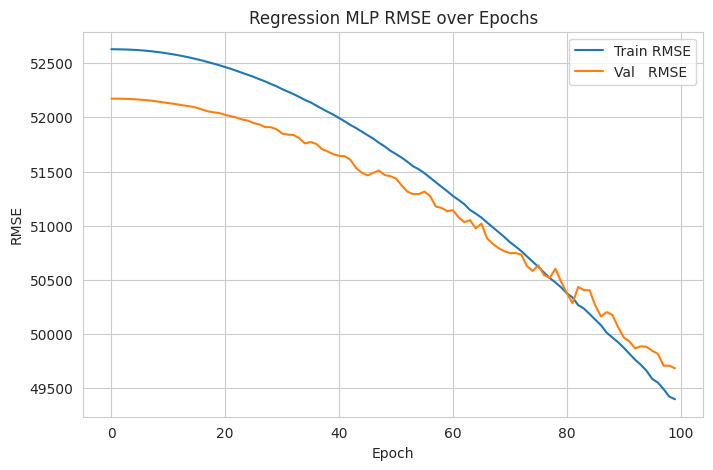

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Regression Evaluation Metrics:
 • R²   : -10.9275
 • MAE  : 48199.14
 • RMSE : 50386.31


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,090 (195.66 KB)

 Trainable params: 49,144 (191.97 KB)

 Non-trainable params: 946 (3.70 KB)

Epoch 1/100
50/50 - 4s - 73ms/step - accuracy: 0.1700 - loss: 2.4961 - val_accuracy: 0.1325 - val_loss: 1.8116 - learning_rate: 1.0000e-03
Epoch 2/100
50/50 - 0s - 7ms/step - accuracy: 0.1988 - loss: 2.1592 - val_accuracy: 0.1363 - val_loss: 1.8198 - learning_rate: 1.0000e-03
Epoch 3/100
50/50 - 1s - 12ms/step - accuracy: 0.1894 - loss: 2.0856 - val_accuracy: 0.1325 - val_loss: 1.8273 - learning_rate: 1.0000e-03
Epoch 4/100
50/50 - 1s - 12ms/step - accuracy: 0.1881 - loss: 1.9943 - val_accuracy: 0.1350 - val_loss: 1.8223 - learning_rate: 1.0000e-03
Epoch 5/100
50/50 - 0s - 6ms/step - accuracy: 0.1969 - loss: 1.9301 - val_accuracy: 0.1450 - val_loss: 1.8282 - learning_rate: 1.0000e-03
Epoch 6/100
50/50 - 0s - 7ms/step - accuracy: 0.2172 - loss: 1.8843 - val_accuracy: 0.1400 - val_loss: 1.8346 - learning_rate: 1.0000e-03
Epoch 7/100
50/50 - 1s - 12ms/step - accuracy: 0.2256 - loss: 1.8708 - val_accuracy: 0.1437 - val_loss: 1.8384 - learning_rate: 1.0000e-03
Epoch 8/100
50/50 - 1s - 12ms/

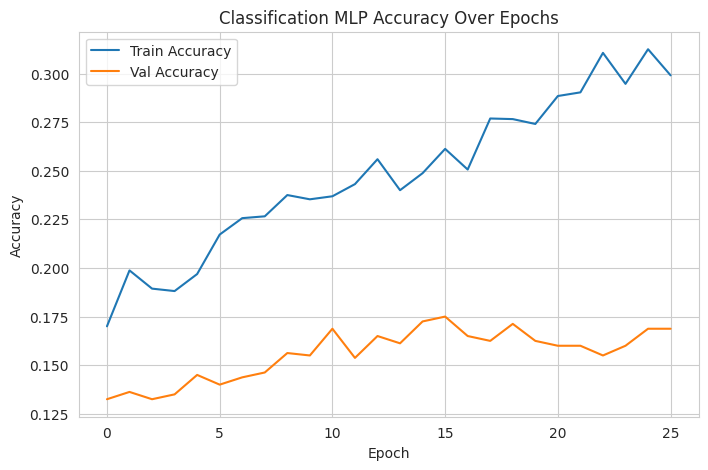

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Classification Evaluation Metrics:
 • Accuracy : 0.172
 • Precision: 0.1728736326405358
 • Recall   : 0.172
 • F1-score : 0.16803174049932457


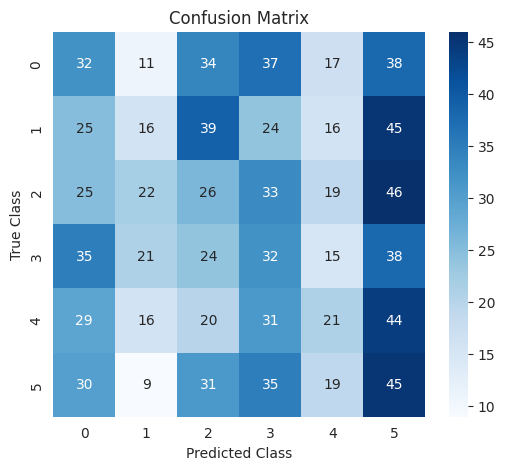

In [11]:
# ─── Regression Training & Evaluation ───────────────────────────────────────────

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras import layers, models, optimizers, losses, metrics, callbacks

# 1) Re-define the MLP builder
def build_regression_mlp(input_dim):
    inp = layers.Input(shape=(input_dim,))
    x = layers.BatchNormalization()(inp)
    for units in [256, 128, 64]:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x)
    out = layers.Dense(1, activation='linear')(x)
    model = models.Model(inputs=inp, outputs=out)
    model.compile(
        optimizer=optimizers.Adam(1e-3),
        loss=losses.MeanSquaredError(),
        metrics=[metrics.RootMeanSquaredError(name='rmse'),
                 metrics.MeanAbsoluteError(name='mae')]
    )
    return model

# 2) Callbacks
reg_callbacks = [
    callbacks.EarlyStopping(monitor='val_rmse', patience=10, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=5)
]

# 3) Build and train
reg_model = build_regression_mlp(num_features)
history_reg = reg_model.fit(
    X_tr_reg, y_tr_reg,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=reg_callbacks,
    verbose=2
)

# 4) Plot training curves
plt.figure(figsize=(8,5))
plt.plot(history_reg.history['rmse'],    label='Train RMSE')
plt.plot(history_reg.history['val_rmse'],label='Val   RMSE')
plt.title('Regression MLP RMSE over Epochs')
plt.xlabel('Epoch'); plt.ylabel('RMSE'); plt.legend(); plt.show()

# 5) Predict and evaluate
y_pred_reg = reg_model.predict(X_te_reg).flatten()

r2   = r2_score(y_te_reg, y_pred_reg)
mae  = mean_absolute_error(y_te_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_te_reg, y_pred_reg))

print("Regression Evaluation Metrics:")
print(f" • R²   : {r2:.4f}")
print(f" • MAE  : {mae:.2f}")
print(f" • RMSE : {rmse:.2f}")
# ----------------------------------------------------------------------------------------------------------------------
# Phase 4: Build, Compile & Train Classification MLP (Expert-Level)
# ----------------------------------------------------------------------------------------------------------------------

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Build the classification MLP
def build_classification_mlp(input_dim, n_classes):
    inp = layers.Input(shape=(input_dim,))
    x = layers.BatchNormalization()(inp)
    for units in [256, 128, 64]:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x)
    out = layers.Dense(n_classes, activation='softmax')(x)
    model = models.Model(inputs=inp, outputs=out)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

clf_model = build_classification_mlp(num_features, num_classes)
clf_model.summary()

# Callbacks for classification
clf_callbacks = [
    callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5)
]

# Train classification model
history_clf = clf_model.fit(
    X_tr_clf, y_tr_clf,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=clf_callbacks,
    verbose=2
)

# Plot training curves for classification
plt.figure(figsize=(8,5))
plt.plot(history_clf.history['accuracy'], label='Train Accuracy')
plt.plot(history_clf.history['val_accuracy'], label='Val Accuracy')
plt.title('Classification MLP Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate classification on test set
y_pred_proba = clf_model.predict(X_te_clf)
y_pred_clf   = np.argmax(y_pred_proba, axis=1)

print("Classification Evaluation Metrics:")
print(" • Accuracy :", accuracy_score(y_te_clf, y_pred_clf))
print(" • Precision:", precision_score(y_te_clf, y_pred_clf, average='weighted'))
print(" • Recall   :", recall_score(y_te_clf, y_pred_clf, average='weighted'))
print(" • F1-score :", f1_score(y_te_clf, y_pred_clf, average='weighted'))

# Confusion Matrix
cm = confusion_matrix(y_te_clf, y_pred_clf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,765 (194.39 KB)

 Trainable params: 48,819 (190.70 KB)

 Non-trainable params: 946 (3.70 KB)

Epoch 1/100
50/50 - 5s - 94ms/step - loss: 2769689344.0000 - mae: 50608.7656 - rmse: 52627.8398 - val_loss: 2721921536.0000 - val_mae: 50091.5938 - val_rmse: 52172.0391 - learning_rate: 1.0000e-03
Epoch 2/100
50/50 - 1s - 17ms/step - loss: 2769623040.0000 - mae: 50608.1211 - rmse: 52627.2070 - val_loss: 2721870592.0000 - val_mae: 50091.0859 - val_rmse: 52171.5508 - learning_rate: 1.0000e-03
Epoch 3/100
50/50 - 1s - 10ms/step - loss: 2769508864.0000 - mae: 50607.0234 - rmse: 52626.1250 - val_loss: 2721743104.0000 - val_mae: 50089.8086 - val_rmse: 52170.3281 - learning_rate: 1.0000e-03
Epoch 4/100
50/50 - 0s - 7ms/step - loss: 2769337344.0000 - mae: 50605.3789 - rmse: 52624.4922 - val_loss: 2721533184.0000 - val_mae: 50087.6992 - val_rmse: 52168.3164 - learning_rate: 1.0000e-03
Epoch 5/100
50/50 - 1s - 12ms/step - loss: 2769076480.0000 - mae: 50602.8750 - rmse: 52622.0156 - val_loss: 2721236480.0000 - val_mae: 50084.7148 - val_rmse: 52165.4727 - learning_rate: 1.0000e-03
Epoch 6/100
50/5

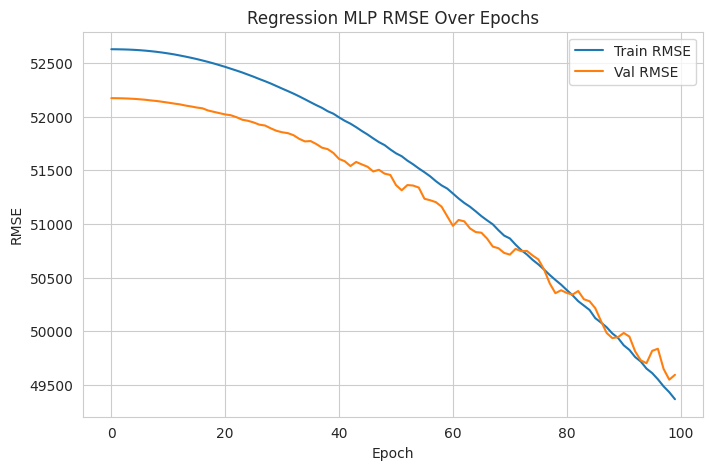

Regression Evaluation Metrics:
 • R²   : -10.927497699542727
 • MAE  : 48199.139772132396
 • RMSE : 50386.312548505055


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,090 (195.66 KB)

 Trainable params: 49,144 (191.97 KB)

 Non-trainable params: 946 (3.70 KB)

Epoch 1/100
50/50 - 5s - 97ms/step - accuracy: 0.1656 - loss: 2.4674 - val_accuracy: 0.1637 - val_loss: 1.8223 - learning_rate: 1.0000e-03
Epoch 2/100
50/50 - 0s - 7ms/step - accuracy: 0.1878 - loss: 2.1682 - val_accuracy: 0.1663 - val_loss: 1.8337 - learning_rate: 1.0000e-03
Epoch 3/100
50/50 - 1s - 12ms/step - accuracy: 0.1806 - loss: 2.0658 - val_accuracy: 0.1513 - val_loss: 1.8432 - learning_rate: 1.0000e-03
Epoch 4/100
50/50 - 1s - 12ms/step - accuracy: 0.2006 - loss: 1.9621 - val_accuracy: 0.1700 - val_loss: 1.8357 - learning_rate: 1.0000e-03
Epoch 5/100
50/50 - 1s - 13ms/step - accuracy: 0.2037 - loss: 1.9222 - val_accuracy: 0.1737 - val_loss: 1.8312 - learning_rate: 1.0000e-03
Epoch 6/100
50/50 - 0s - 7ms/step - accuracy: 0.2041 - loss: 1.8780 - val_accuracy: 0.1813 - val_loss: 1.8314 - learning_rate: 1.0000e-03
Epoch 7/100
50/50 - 0s - 6ms/step - accuracy: 0.2113 - loss: 1.8583 - val_accuracy: 0.1663 - val_loss: 1.8344 - learning_rate: 1.0000e-03
Epoch 8/100
50/50 - 0s - 7ms/s

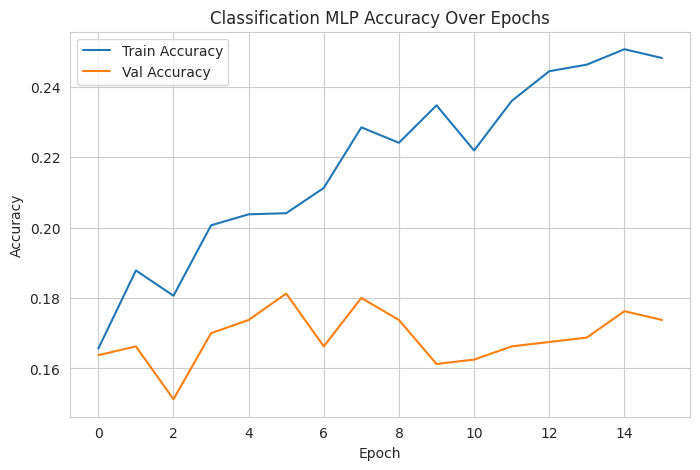

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Evaluation Metrics:
 • Accuracy : 0.162
 • Precision: 0.15936553080145896
 • Recall   : 0.162
 • F1-score : 0.14195975590061516


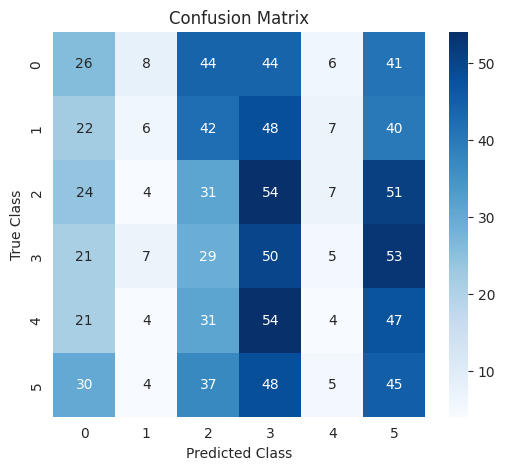

In [12]:
# ----------------------------------------------------------------------------------------------------------------------
# Phase 3: Build, Compile & Train Regression MLP (Expert-Level)
# ----------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from tensorflow.keras import layers, models, optimizers, losses, metrics, callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Build the regression MLP
def build_regression_mlp(input_dim):
    inp = layers.Input(shape=(input_dim,))
    x = layers.BatchNormalization()(inp)
    for units in [256, 128, 64]:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x)
    out = layers.Dense(1, activation='linear')(x)
    model = models.Model(inputs=inp, outputs=out)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.MeanSquaredError(),
        metrics=[metrics.RootMeanSquaredError(name='rmse'),
                 metrics.MeanAbsoluteError(name='mae')]
    )
    return model

reg_model = build_regression_mlp(num_features)
reg_model.summary()

# Callbacks for regression
reg_callbacks = [
    callbacks.EarlyStopping(monitor='val_rmse', patience=10, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=5)
]

# Train regression model
history_reg = reg_model.fit(
    X_tr_reg, y_tr_reg,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=reg_callbacks,
    verbose=2
)

# Plot training curves for regression
plt.figure(figsize=(8,5))
plt.plot(history_reg.history['rmse'], label='Train RMSE')
plt.plot(history_reg.history['val_rmse'], label='Val RMSE')
plt.title('Regression MLP RMSE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Evaluate regression on test set
print("Regression Evaluation Metrics:")
print(" • R²   :", r2_score(y_te_reg, y_pred_reg))
print(" • MAE  :", mean_absolute_error(y_te_reg, y_pred_reg))
rmse = np.sqrt(mean_squared_error(y_te_reg, y_pred_reg))
print(" • RMSE :", rmse)

# ----------------------------------------------------------------------------------------------------------------------
# Phase 4: Build, Compile & Train Classification MLP (Expert-Level)
# ----------------------------------------------------------------------------------------------------------------------

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Build the classification MLP
def build_classification_mlp(input_dim, n_classes):
    inp = layers.Input(shape=(input_dim,))
    x = layers.BatchNormalization()(inp)
    for units in [256, 128, 64]:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x)
    out = layers.Dense(n_classes, activation='softmax')(x)
    model = models.Model(inputs=inp, outputs=out)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

clf_model = build_classification_mlp(num_features, num_classes)
clf_model.summary()

# Callbacks for classification
clf_callbacks = [
    callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5)
]

# Train classification model
history_clf = clf_model.fit(
    X_tr_clf, y_tr_clf,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=clf_callbacks,
    verbose=2
)

# Plot training curves for classification
plt.figure(figsize=(8,5))
plt.plot(history_clf.history['accuracy'], label='Train Accuracy')
plt.plot(history_clf.history['val_accuracy'], label='Val Accuracy')
plt.title('Classification MLP Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate classification on test set
y_pred_proba = clf_model.predict(X_te_clf)
y_pred_clf   = np.argmax(y_pred_proba, axis=1)

print("Classification Evaluation Metrics:")
print(" • Accuracy :", accuracy_score(y_te_clf, y_pred_clf))
print(" • Precision:", precision_score(y_te_clf, y_pred_clf, average='weighted'))
print(" • Recall   :", recall_score(y_te_clf, y_pred_clf, average='weighted'))
print(" • F1-score :", f1_score(y_te_clf, y_pred_clf, average='weighted'))

# Confusion Matrix
cm = confusion_matrix(y_te_clf, y_pred_clf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,765 (194.39 KB)

 Trainable params: 48,819 (190.70 KB)

 Non-trainable params: 946 (3.70 KB)

Epoch 1/100
50/50 - 5s - 100ms/step - loss: 2769686784.0000 - mae: 50608.7539 - rmse: 52627.8125 - val_loss: 2721899008.0000 - val_mae: 50091.3555 - val_rmse: 52171.8203 - learning_rate: 1.0000e-03
Epoch 2/100
50/50 - 0s - 7ms/step - loss: 2769617152.0000 - mae: 50608.0781 - rmse: 52627.1523 - val_loss: 2721841152.0000 - val_mae: 50090.7812 - val_rmse: 52171.2656 - learning_rate: 1.0000e-03
Epoch 3/100
50/50 - 1s - 12ms/step - loss: 2769498880.0000 - mae: 50606.9492 - rmse: 52626.0273 - val_loss: 2721731328.0000 - val_mae: 50089.6719 - val_rmse: 52170.2148 - learning_rate: 1.0000e-03
Epoch 4/100
50/50 - 0s - 6ms/step - loss: 2769322752.0000 - mae: 50605.2539 - rmse: 52624.3555 - val_loss: 2721515264.0000 - val_mae: 50087.4688 - val_rmse: 52168.1445 - learning_rate: 1.0000e-03
Epoch 5/100
50/50 - 1s - 12ms/step - loss: 2769054208.0000 - mae: 50602.6719 - rmse: 52621.8047 - val_loss: 2721201152.0000 - val_mae: 50084.3164 - val_rmse: 52165.1328 - learning_rate: 1.0000e-03
Epoch 6/100
50/5

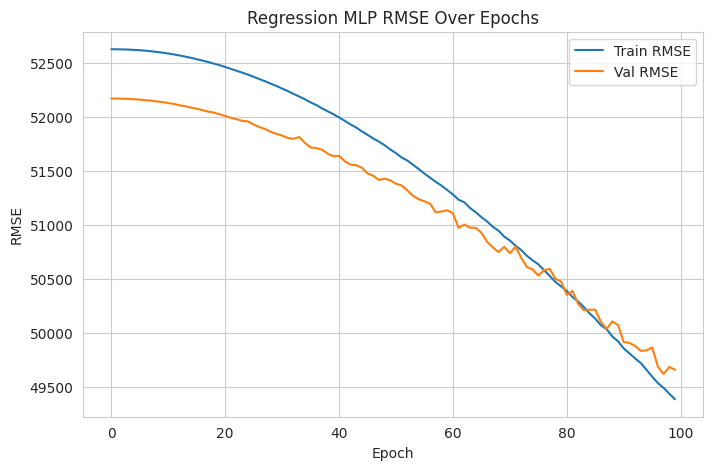

Regression Evaluation Metrics:
 • R²   : -10.927497699542727
 • MAE  : 48199.139772132396
 • RMSE : 50386.312548505055


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,090 (195.66 KB)

 Trainable params: 49,144 (191.97 KB)

 Non-trainable params: 946 (3.70 KB)

Epoch 1/100
50/50 - 5s - 91ms/step - accuracy: 0.1688 - loss: 2.4244 - val_accuracy: 0.1388 - val_loss: 1.8035 - learning_rate: 1.0000e-03
Epoch 2/100
50/50 - 0s - 6ms/step - accuracy: 0.1900 - loss: 2.1462 - val_accuracy: 0.1663 - val_loss: 1.8141 - learning_rate: 1.0000e-03
Epoch 3/100
50/50 - 1s - 12ms/step - accuracy: 0.1894 - loss: 2.0256 - val_accuracy: 0.1425 - val_loss: 1.8220 - learning_rate: 1.0000e-03
Epoch 4/100
50/50 - 0s - 6ms/step - accuracy: 0.2097 - loss: 1.9800 - val_accuracy: 0.1363 - val_loss: 1.8246 - learning_rate: 1.0000e-03
Epoch 5/100
50/50 - 1s - 21ms/step - accuracy: 0.2103 - loss: 1.8977 - val_accuracy: 0.1388 - val_loss: 1.8228 - learning_rate: 1.0000e-03
Epoch 6/100
50/50 - 0s - 10ms/step - accuracy: 0.2091 - loss: 1.8806 - val_accuracy: 0.1488 - val_loss: 1.8293 - learning_rate: 1.0000e-03
Epoch 7/100
50/50 - 0s - 6ms/step - accuracy: 0.2175 - loss: 1.8371 - val_accuracy: 0.1637 - val_loss: 1.8343 - learning_rate: 1.0000e-03
Epoch 8/100
50/50 - 0s - 6ms/s

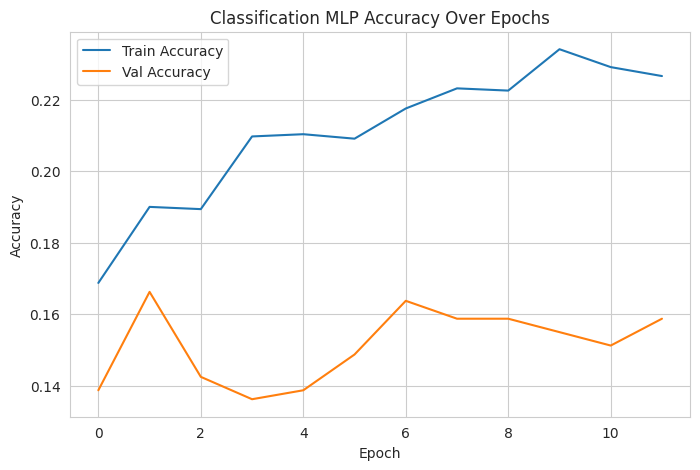

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Evaluation Metrics:
 • Accuracy : 0.171
 • Precision: 0.13620921435891578
 • Recall   : 0.171
 • F1-score : 0.12523877113885076


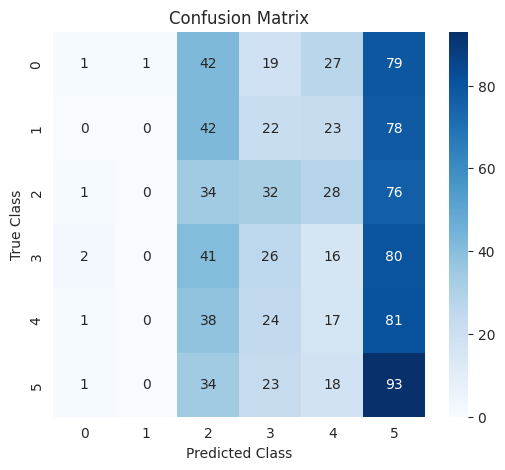

In [13]:
# ----------------------------------------------------------------------------------------------------------------------
# Phase 3: Build, Compile & Train Regression MLP (Expert-Level)
# ----------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from tensorflow.keras import layers, models, optimizers, losses, metrics, callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Build the regression MLP
def build_regression_mlp(input_dim):
    inp = layers.Input(shape=(input_dim,))
    x = layers.BatchNormalization()(inp)
    for units in [256, 128, 64]:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x)
    out = layers.Dense(1, activation='linear')(x)
    model = models.Model(inputs=inp, outputs=out)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.MeanSquaredError(),
        metrics=[metrics.RootMeanSquaredError(name='rmse'),
                 metrics.MeanAbsoluteError(name='mae')]
    )
    return model

reg_model = build_regression_mlp(num_features)
reg_model.summary()

# Callbacks for regression
reg_callbacks = [
    callbacks.EarlyStopping(monitor='val_rmse', patience=10, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=5)
]

# Train regression model
history_reg = reg_model.fit(
    X_tr_reg, y_tr_reg,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=reg_callbacks,
    verbose=2
)

# Plot training curves for regression
plt.figure(figsize=(8,5))
plt.plot(history_reg.history['rmse'], label='Train RMSE')
plt.plot(history_reg.history['val_rmse'], label='Val RMSE')
plt.title('Regression MLP RMSE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Evaluate regression on test set
print("Regression Evaluation Metrics:")
print(" • R²   :", r2_score(y_te_reg, y_pred_reg))
print(" • MAE  :", mean_absolute_error(y_te_reg, y_pred_reg))
rmse = np.sqrt(mean_squared_error(y_te_reg, y_pred_reg))
print(" • RMSE :", rmse)

# ----------------------------------------------------------------------------------------------------------------------
# Phase 4: Build, Compile & Train Classification MLP (Expert-Level)
# ----------------------------------------------------------------------------------------------------------------------

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Build the classification MLP
def build_classification_mlp(input_dim, n_classes):
    inp = layers.Input(shape=(input_dim,))
    x = layers.BatchNormalization()(inp)
    for units in [256, 128, 64]:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x)
    out = layers.Dense(n_classes, activation='softmax')(x)
    model = models.Model(inputs=inp, outputs=out)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

clf_model = build_classification_mlp(num_features, num_classes)
clf_model.summary()

# Callbacks for classification
clf_callbacks = [
    callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5)
]

# Train classification model
history_clf = clf_model.fit(
    X_tr_clf, y_tr_clf,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=clf_callbacks,
    verbose=2
)

# Plot training curves for classification
plt.figure(figsize=(8,5))
plt.plot(history_clf.history['accuracy'], label='Train Accuracy')
plt.plot(history_clf.history['val_accuracy'], label='Val Accuracy')
plt.title('Classification MLP Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate classification on test set
y_pred_proba = clf_model.predict(X_te_clf)
y_pred_clf   = np.argmax(y_pred_proba, axis=1)

print("Classification Evaluation Metrics:")
print(" • Accuracy :", accuracy_score(y_te_clf, y_pred_clf))
print(" • Precision:", precision_score(y_te_clf, y_pred_clf, average='weighted'))
print(" • Recall   :", recall_score(y_te_clf, y_pred_clf, average='weighted'))
print(" • F1-score :", f1_score(y_te_clf, y_pred_clf, average='weighted'))

# Confusion Matrix
cm = confusion_matrix(y_te_clf, y_pred_clf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

Epoch 1/100
50/50 - 6s - 112ms/step - loss: 2769688320.0000 - mae: 50608.7539 - rmse: 52627.8281 - val_loss: 2721932288.0000 - val_mae: 50091.6992 - val_rmse: 52172.1406 - learning_rate: 1.0000e-03
Epoch 2/100
50/50 - 1s - 15ms/step - loss: 2769620480.0000 - mae: 50608.1055 - rmse: 52627.1836 - val_loss: 2721887488.0000 - val_mae: 50091.2500 - val_rmse: 52171.7109 - learning_rate: 1.0000e-03
Epoch 3/100
50/50 - 1s - 12ms/step - loss: 2769506816.0000 - mae: 50607.0039 - rmse: 52626.1055 - val_loss: 2721767424.0000 - val_mae: 50090.0469 - val_rmse: 52170.5625 - learning_rate: 1.0000e-03
Epoch 4/100
50/50 - 1s - 12ms/step - loss: 2769330944.0000 - mae: 50605.3164 - rmse: 52624.4336 - val_loss: 2721576960.0000 - val_mae: 50088.1367 - val_rmse: 52168.7344 - learning_rate: 1.0000e-03
Epoch 5/100
50/50 - 1s - 13ms/step - loss: 2769056768.0000 - mae: 50602.7148 - rmse: 52621.8281 - val_loss: 2721287936.0000 - val_mae: 50085.2109 - val_rmse: 52165.9648 - learning_rate: 1.0000e-03
Epoch 6/100
50

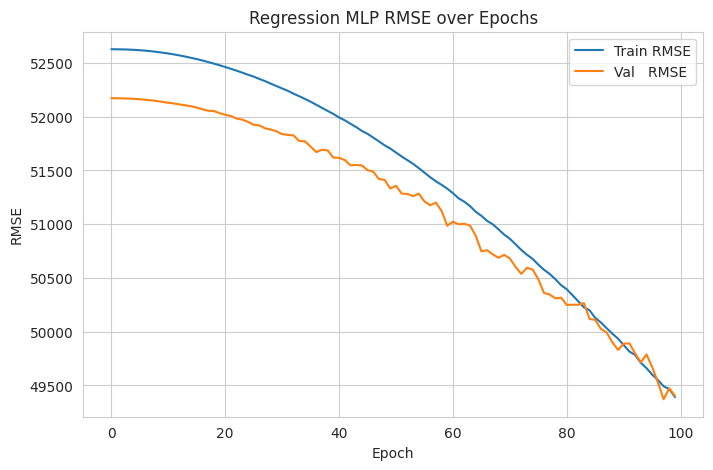

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Regression Evaluation Metrics:
 • R²   : -10.8264
 • MAE  : 47979.33
 • RMSE : 50172.24


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,090 (195.66 KB)

 Trainable params: 49,144 (191.97 KB)

 Non-trainable params: 946 (3.70 KB)

Epoch 1/100
50/50 - 4s - 76ms/step - accuracy: 0.1637 - loss: 2.5443 - val_accuracy: 0.1400 - val_loss: 1.8164 - learning_rate: 1.0000e-03
Epoch 2/100
50/50 - 0s - 7ms/step - accuracy: 0.1822 - loss: 2.2102 - val_accuracy: 0.1500 - val_loss: 1.8227 - learning_rate: 1.0000e-03
Epoch 3/100
50/50 - 1s - 12ms/step - accuracy: 0.1897 - loss: 2.0907 - val_accuracy: 0.1675 - val_loss: 1.8151 - learning_rate: 1.0000e-03
Epoch 4/100
50/50 - 0s - 6ms/step - accuracy: 0.1853 - loss: 2.0114 - val_accuracy: 0.1650 - val_loss: 1.8196 - learning_rate: 1.0000e-03
Epoch 5/100
50/50 - 0s - 6ms/step - accuracy: 0.2031 - loss: 1.9333 - val_accuracy: 0.1587 - val_loss: 1.8160 - learning_rate: 1.0000e-03
Epoch 6/100
50/50 - 0s - 7ms/step - accuracy: 0.2150 - loss: 1.8819 - val_accuracy: 0.1750 - val_loss: 1.8206 - learning_rate: 1.0000e-03
Epoch 7/100
50/50 - 0s - 6ms/step - accuracy: 0.2184 - loss: 1.8556 - val_accuracy: 0.1737 - val_loss: 1.8224 - learning_rate: 1.0000e-03
Epoch 8/100
50/50 - 1s - 12ms/st

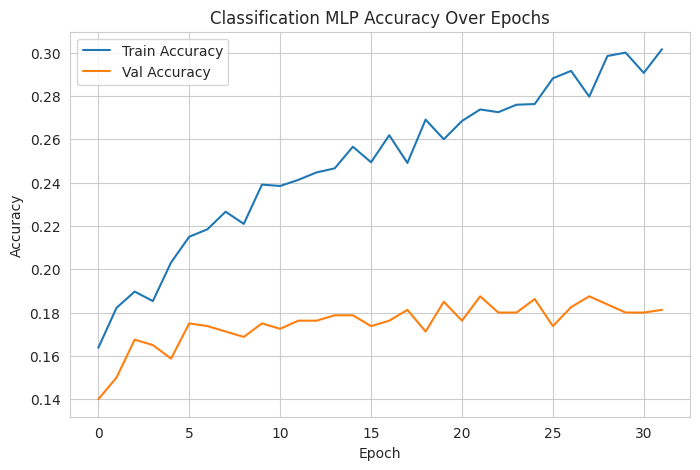

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Evaluation Metrics:
 • Accuracy : 0.191
 • Precision: 0.19068641182637475
 • Recall   : 0.191
 • F1-score : 0.1898896776349108


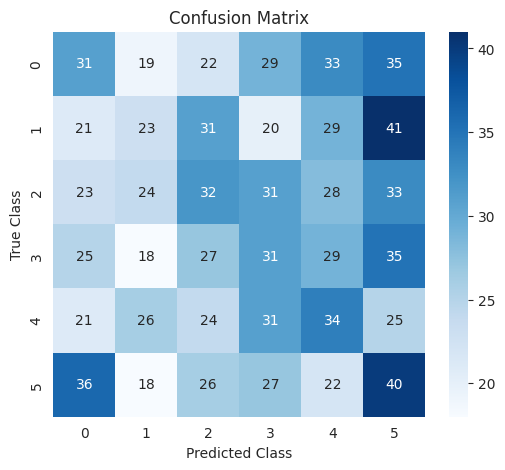

In [14]:
# ─── Regression Training & Evaluation ───────────────────────────────────────────

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras import layers, models, optimizers, losses, metrics, callbacks

# 1) Re-define the MLP builder
def build_regression_mlp(input_dim):
    inp = layers.Input(shape=(input_dim,))
    x = layers.BatchNormalization()(inp)
    for units in [256, 128, 64]:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x)
    out = layers.Dense(1, activation='linear')(x)
    model = models.Model(inputs=inp, outputs=out)
    model.compile(
        optimizer=optimizers.Adam(1e-3),
        loss=losses.MeanSquaredError(),
        metrics=[metrics.RootMeanSquaredError(name='rmse'),
                 metrics.MeanAbsoluteError(name='mae')]
    )
    return model

# 2) Callbacks
reg_callbacks = [
    callbacks.EarlyStopping(monitor='val_rmse', patience=10, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=5)
]

# 3) Build and train
reg_model = build_regression_mlp(num_features)
history_reg = reg_model.fit(
    X_tr_reg, y_tr_reg,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=reg_callbacks,
    verbose=2
)

# 4) Plot training curves
plt.figure(figsize=(8,5))
plt.plot(history_reg.history['rmse'],    label='Train RMSE')
plt.plot(history_reg.history['val_rmse'],label='Val   RMSE')
plt.title('Regression MLP RMSE over Epochs')
plt.xlabel('Epoch'); plt.ylabel('RMSE'); plt.legend(); plt.show()

# 5) Predict and evaluate
y_pred_reg = reg_model.predict(X_te_reg).flatten()

r2   = r2_score(y_te_reg, y_pred_reg)
mae  = mean_absolute_error(y_te_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_te_reg, y_pred_reg))

print("Regression Evaluation Metrics:")
print(f" • R²   : {r2:.4f}")
print(f" • MAE  : {mae:.2f}")
print(f" • RMSE : {rmse:.2f}")
# ----------------------------------------------------------------------------------------------------------------------
# Phase 4: Build, Compile & Train Classification MLP (Expert-Level)
# ----------------------------------------------------------------------------------------------------------------------

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Build the classification MLP
def build_classification_mlp(input_dim, n_classes):
    inp = layers.Input(shape=(input_dim,))
    x = layers.BatchNormalization()(inp)
    for units in [256, 128, 64]:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x)
    out = layers.Dense(n_classes, activation='softmax')(x)
    model = models.Model(inputs=inp, outputs=out)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

clf_model = build_classification_mlp(num_features, num_classes)
clf_model.summary()

# Callbacks for classification
clf_callbacks = [
    callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5)
]

# Train classification model
history_clf = clf_model.fit(
    X_tr_clf, y_tr_clf,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=clf_callbacks,
    verbose=2
)

# Plot training curves for classification
plt.figure(figsize=(8,5))
plt.plot(history_clf.history['accuracy'], label='Train Accuracy')
plt.plot(history_clf.history['val_accuracy'], label='Val Accuracy')
plt.title('Classification MLP Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate classification on test set
y_pred_proba = clf_model.predict(X_te_clf)
y_pred_clf   = np.argmax(y_pred_proba, axis=1)

print("Classification Evaluation Metrics:")
print(" • Accuracy :", accuracy_score(y_te_clf, y_pred_clf))
print(" • Precision:", precision_score(y_te_clf, y_pred_clf, average='weighted'))
print(" • Recall   :", recall_score(y_te_clf, y_pred_clf, average='weighted'))
print(" • F1-score :", f1_score(y_te_clf, y_pred_clf, average='weighted'))

# Confusion Matrix
cm = confusion_matrix(y_te_clf, y_pred_clf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

Phase 5.1: Prepare Feature Names

In [15]:
# If you still have preproc_keras, num_cols, cat_cols in memory:
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Extract one-hot names for categorical cols
cat_encoder = preproc_keras.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(cat_cols)

# Combine
feature_names = num_cols + list(cat_feature_names)


Phase 5.2: SHAP for Regression MLP

5.2.1 Create the Explainer

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_72
Received: inputs=['Tensor(shape=(200, 25))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_72
Received: inputs=['Tensor(shape=(50, 25))']
  warnings.warn(msg)


✅ Using GradientExplainer


<ipython-input-16-fba801ea6ebf>:21: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_reg, test_subset, feature_names=feature_names, plot_type="bar")
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


<Figure size 800x500 with 0 Axes>

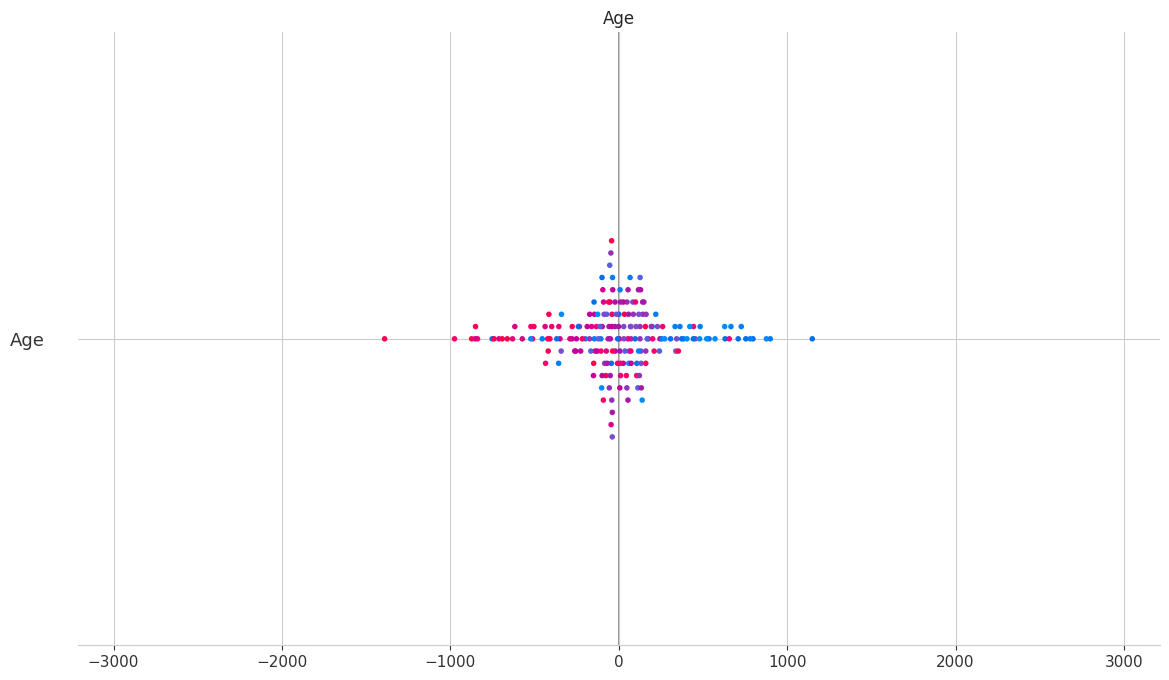

<ipython-input-16-fba801ea6ebf>:22: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_reg, test_subset, feature_names=feature_names)
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


<Figure size 800x500 with 0 Axes>

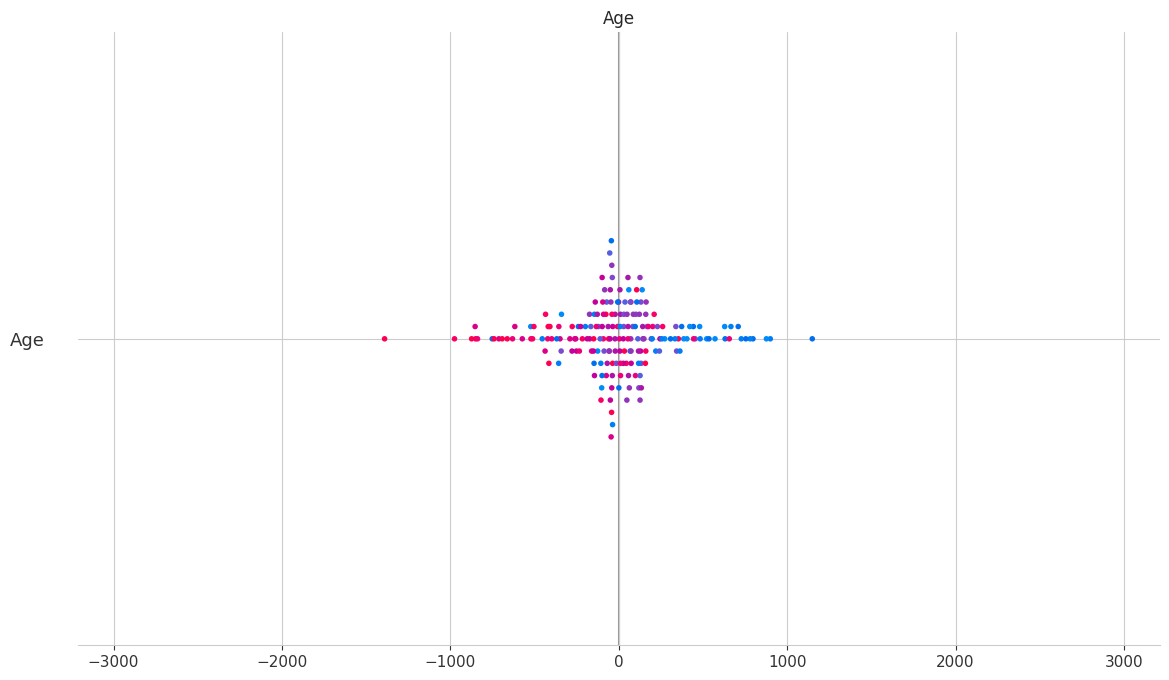

In [16]:
import shap
import numpy as np

# 1) Select a small background sample for speed (e.g. 200 rows)
background = X_tr_reg[np.random.choice(X_tr_reg.shape[0], 200, replace=False)]
test_subset = X_te_reg[:200]

# 2) Try GradientExplainer (fast, supports TF2 eager)
try:
    explainer_reg = shap.GradientExplainer(reg_model, background)
    shap_values_reg = explainer_reg.shap_values(test_subset)
    print("✅ Using GradientExplainer")

# 3) Fallback to KernelExplainer if GradientExplainer fails
except Exception as e:
    print("⚠ GradientExplainer failed, falling back to KernelExplainer:", e)
    explainer_reg = shap.KernelExplainer(reg_model.predict, background)
    shap_values_reg = explainer_reg.shap_values(test_subset, nsamples=100)

# 4) Plot the summary (bar and beeswarm)
shap.summary_plot(shap_values_reg, test_subset, feature_names=feature_names, plot_type="bar")
shap.summary_plot(shap_values_reg, test_subset, feature_names=feature_names)


In [17]:
import xgboost as xgb

# Convert your preprocessed arrays into DMatrix
dtrain = xgb.DMatrix(X_tr_reg, label=y_tr_reg)
dvalid = xgb.DMatrix(X_te_reg, label=y_te_reg)


In [18]:
# 2.1 Define parameters
params = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
}

# 2.2 Train with early stopping
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=[(dvalid, 'validation')],
    early_stopping_rounds=20,
    verbose_eval=False
)


In [19]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 3.1 Predict
y_pred = bst.predict(dvalid)

# 3.2 Compute metrics
r2   = r2_score(y_te_reg, y_pred)
mae  = mean_absolute_error(y_te_reg, y_pred)
rmse = np.sqrt(mean_squared_error(y_te_reg, y_pred))

print("Regression Metrics (XGB.train):")
print(f" • R²   = {r2:.4f}")
print(f" • MAE  = {mae:.2f}")
print(f" • RMSE = {rmse:.2f}")


Regression Metrics (XGB.train):
 • R²   = -0.0142
 • MAE  = 11925.80
 • RMSE = 14692.70


<ipython-input-20-c0f93ab5cb19>:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals, X_te_reg, feature_names=feature_names, plot_type="bar")


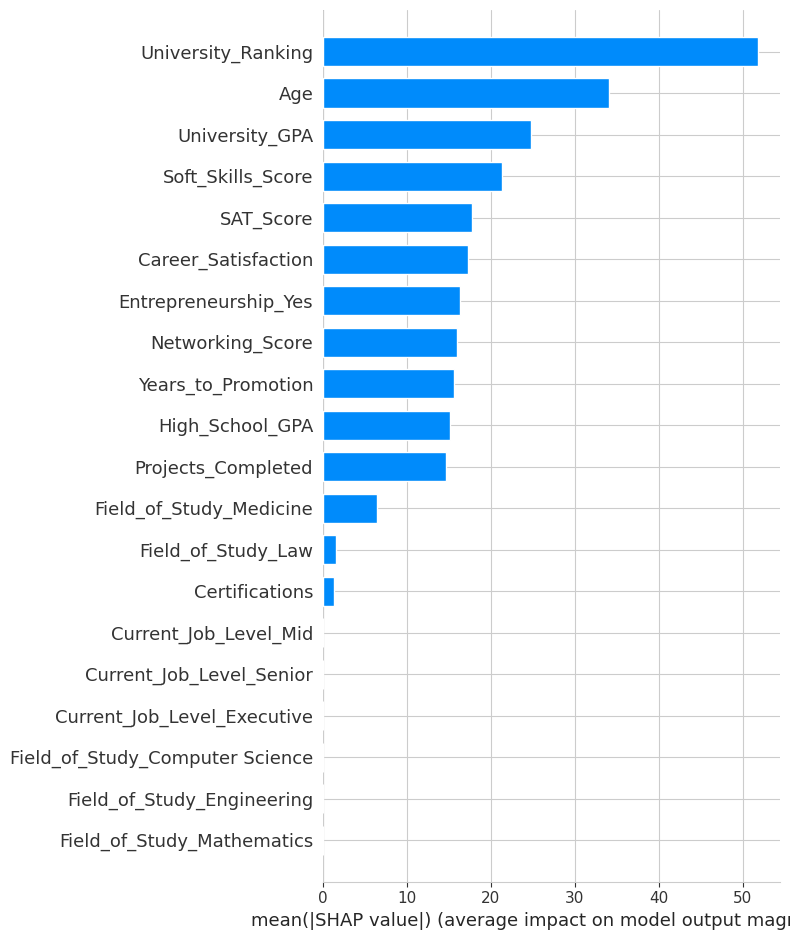

<ipython-input-20-c0f93ab5cb19>:13: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals, X_te_reg, feature_names=feature_names)


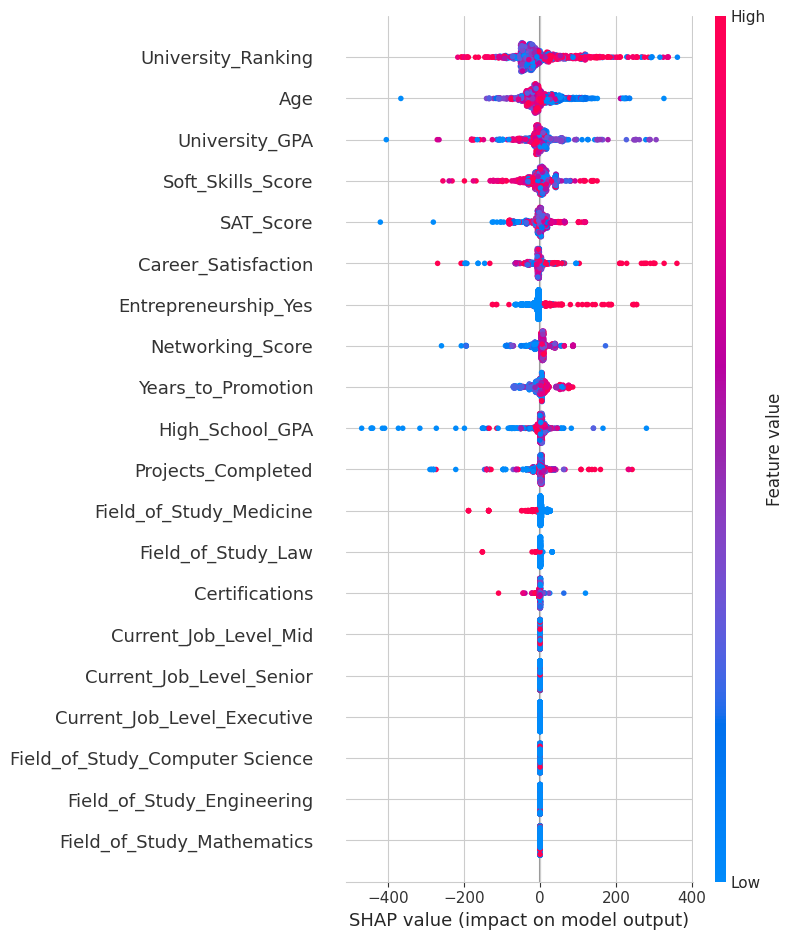

In [20]:
import shap

# 4.1 Create a TreeExplainer on the trained booster
explainer = shap.TreeExplainer(bst)

# 4.2 Compute SHAP values on the validation set
shap_vals = explainer.shap_values(dvalid)

# 4.3 Summary bar plot
shap.summary_plot(shap_vals, X_te_reg, feature_names=feature_names, plot_type="bar")

# 4.4 Beeswarm plot
shap.summary_plot(shap_vals, X_te_reg, feature_names=feature_names)


In [21]:
import numpy as np

# 1) Define your feature DataFrame (drop ID & targets)
X = df.drop(columns=['Student_ID', 'Starting_Salary', 'Job_Offers'])

# 2) Split into numeric vs. categorical
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# 3) Extract the one‐hot names from your fitted ColumnTransformer
cat_encoder = preproc_keras.named_transformers_['cat']
onehot_feature_names = cat_encoder.get_feature_names_out(cat_cols)

# 4) Combine
feature_names = num_cols + list(onehot_feature_names)

# 5) Quick check
print("Total features:", len(feature_names))
print("First 10 features:", feature_names[:10])


Total features: 25
First 10 features: ['Age', 'High_School_GPA', 'SAT_Score', 'University_Ranking', 'University_GPA', 'Internships_Completed', 'Projects_Completed', 'Certifications', 'Soft_Skills_Score', 'Networking_Score']


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:   0%|          | 1/200 [00:00<?, ?it/s]

95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:   2%|▏         | 3/200 [00:22<16:41,  5.08s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


PermutationExplainer explainer:   2%|▏         | 4/200 [00:33<24:08,  7.39s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▎         | 5/200 [00:41<25:26,  7.83s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:   3%|▎         | 6/200 [00:50<26:26,  8.18s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▎         | 7/200 [00:54<22:17,  6.93s/it]

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 8/200 [00:57<18:10,  5.68s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 9/200 [01:01<16:28,  5.18s/it]

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 10/200 [01:05<14:51,  4.69s/it]

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 11/200 [01:08<13:20,  4.24s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 12/200 [01:11<12:11,  3.89s/it]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 13/200 [01:16<12:38,  4.06s/it]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 14/200 [01:19<11:58,  3.86s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 15/200 [01:22<11:07,  3.61s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 16/200 [01:26<10:58,  3.58s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 17/200 [01:30<11:05,  3.64s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 18/200 [01:33<10:25,  3.44s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 19/200 [01:35<09:55,  3.29s/it]

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 20/200 [01:39<09:44,  3.25s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  10%|█         | 21/200 [01:42<09:59,  3.35s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 22/200 [01:46<10:05,  3.40s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 23/200 [01:49<09:44,  3.30s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 24/200 [01:52<09:43,  3.32s/it]

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▎        | 25/200 [01:56<10:03,  3.45s/it]

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 26/200 [01:59<09:58,  3.44s/it]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 27/200 [02:02<09:29,  3.29s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 28/200 [02:05<09:12,  3.21s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 29/200 [02:09<09:19,  3.27s/it]

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 30/200 [02:13<09:49,  3.47s/it]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 31/200 [02:16<09:35,  3.40s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 32/200 [02:19<08:59,  3.21s/it]

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 33/200 [02:22<09:14,  3.32s/it]

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 34/200 [02:26<09:29,  3.43s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 35/200 [02:29<09:04,  3.30s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 36/200 [02:32<09:09,  3.35s/it]

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 37/200 [02:36<09:21,  3.45s/it]

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 38/200 [02:40<09:21,  3.47s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 39/200 [02:43<09:00,  3.35s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 40/200 [02:46<08:39,  3.25s/it]

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 41/200 [02:49<08:57,  3.38s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 42/200 [02:53<08:55,  3.39s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 43/200 [02:56<08:51,  3.38s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 44/200 [02:59<08:34,  3.30s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▎       | 45/200 [03:03<08:58,  3.48s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 46/200 [03:07<09:00,  3.51s/it]

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 47/200 [03:10<08:47,  3.44s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 48/200 [03:13<08:26,  3.33s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 49/200 [03:17<08:38,  3.43s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 50/200 [03:20<08:34,  3.43s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 51/200 [03:23<08:10,  3.29s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 52/200 [03:26<08:09,  3.31s/it]

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  26%|██▋       | 53/200 [03:30<08:24,  3.43s/it]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 54/200 [03:34<08:35,  3.53s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 55/200 [03:37<08:02,  3.33s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 56/200 [03:40<08:01,  3.34s/it]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 57/200 [03:44<08:33,  3.59s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 58/200 [03:48<08:19,  3.51s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 59/200 [03:51<07:56,  3.38s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 60/200 [03:54<07:39,  3.28s/it]

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  30%|███       | 61/200 [03:57<07:53,  3.41s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 62/200 [04:01<07:50,  3.41s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 63/200 [04:04<07:32,  3.30s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 64/200 [04:07<07:16,  3.21s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  32%|███▎      | 65/200 [04:10<07:11,  3.19s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 66/200 [04:14<07:41,  3.44s/it]

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  34%|███▎      | 67/200 [04:17<07:32,  3.40s/it]

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 68/200 [04:21<07:39,  3.48s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 69/200 [04:25<07:35,  3.47s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 70/200 [04:28<07:46,  3.59s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 71/200 [04:31<07:21,  3.42s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 72/200 [04:35<07:10,  3.37s/it]

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  36%|███▋      | 73/200 [04:39<07:26,  3.51s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 74/200 [04:42<07:21,  3.51s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 75/200 [04:45<07:10,  3.44s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 76/200 [04:49<07:00,  3.39s/it]

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 77/200 [04:53<07:40,  3.75s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 78/200 [04:56<07:16,  3.57s/it]

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 79/200 [05:00<06:57,  3.45s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 80/200 [05:03<06:50,  3.42s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 81/200 [05:06<06:51,  3.46s/it]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 82/200 [05:10<06:53,  3.50s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 83/200 [05:13<06:30,  3.34s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 84/200 [05:16<06:08,  3.18s/it]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  42%|████▎     | 85/200 [05:19<06:13,  3.25s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 86/200 [05:23<06:37,  3.49s/it]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  44%|████▎     | 87/200 [05:27<06:26,  3.42s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 88/200 [05:30<06:08,  3.29s/it]

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 89/200 [05:33<06:17,  3.40s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  45%|████▌     | 90/200 [05:37<06:26,  3.51s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 91/200 [05:40<06:13,  3.42s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 92/200 [05:43<05:56,  3.30s/it]

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  46%|████▋     | 93/200 [05:47<06:10,  3.46s/it]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 94/200 [05:51<06:14,  3.53s/it]

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 95/200 [05:54<06:05,  3.48s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 96/200 [05:57<05:50,  3.37s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  48%|████▊     | 97/200 [06:01<06:06,  3.56s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 98/200 [06:05<06:24,  3.77s/it]

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 99/200 [06:09<06:09,  3.66s/it]

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 100/200 [06:12<05:59,  3.60s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 101/200 [06:17<06:19,  3.84s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 102/200 [06:20<05:54,  3.62s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 103/200 [06:23<05:34,  3.45s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  52%|█████▏    | 104/200 [06:26<05:33,  3.48s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  52%|█████▎    | 105/200 [06:30<05:38,  3.57s/it]

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 106/200 [06:33<05:19,  3.40s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  54%|█████▎    | 107/200 [06:36<05:10,  3.34s/it]

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  54%|█████▍    | 108/200 [06:40<05:04,  3.30s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  55%|█████▍    | 109/200 [06:43<05:12,  3.43s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 110/200 [06:46<04:57,  3.31s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 111/200 [06:50<04:53,  3.30s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 112/200 [06:53<04:41,  3.20s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  56%|█████▋    | 113/200 [06:57<05:19,  3.67s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 114/200 [07:01<05:08,  3.58s/it]

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  57%|█████▊    | 115/200 [07:04<04:59,  3.52s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  58%|█████▊    | 116/200 [07:08<04:54,  3.50s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 117/200 [07:12<05:13,  3.78s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 118/200 [07:15<05:00,  3.66s/it]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  60%|█████▉    | 119/200 [07:18<04:43,  3.50s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 120/200 [07:22<04:44,  3.56s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 121/200 [07:26<04:49,  3.66s/it]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 122/200 [07:29<04:37,  3.56s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 123/200 [07:32<04:22,  3.41s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 124/200 [07:36<04:25,  3.50s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  62%|██████▎   | 125/200 [07:40<04:26,  3.55s/it]

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 126/200 [07:43<04:20,  3.53s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 127/200 [07:47<04:10,  3.43s/it]

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 128/200 [07:50<04:10,  3.47s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 129/200 [07:54<04:07,  3.48s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  65%|██████▌   | 130/200 [07:57<03:59,  3.42s/it]

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 131/200 [08:00<03:49,  3.33s/it]

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 132/200 [08:04<03:59,  3.52s/it]

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  66%|██████▋   | 133/200 [08:08<03:57,  3.55s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 134/200 [08:11<03:51,  3.51s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 135/200 [08:14<03:41,  3.40s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 136/200 [08:18<03:41,  3.47s/it]

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 137/200 [08:22<03:45,  3.58s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 138/200 [08:25<03:34,  3.46s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  70%|██████▉   | 139/200 [08:28<03:23,  3.33s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  70%|███████   | 140/200 [08:32<03:33,  3.56s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 141/200 [08:35<03:27,  3.52s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 142/200 [08:39<03:19,  3.44s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 143/200 [08:42<03:09,  3.32s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  72%|███████▏  | 144/200 [08:46<03:19,  3.56s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  72%|███████▎  | 145/200 [08:49<03:08,  3.43s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 146/200 [08:52<03:04,  3.42s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  74%|███████▎  | 147/200 [08:56<03:00,  3.40s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 148/200 [09:00<03:06,  3.59s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 149/200 [09:03<03:03,  3.61s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 150/200 [09:07<02:56,  3.53s/it]

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 151/200 [09:10<02:49,  3.46s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 152/200 [09:15<03:04,  3.85s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  76%|███████▋  | 153/200 [09:18<02:51,  3.65s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 154/200 [09:21<02:40,  3.49s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 155/200 [09:24<02:32,  3.38s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 156/200 [09:28<02:40,  3.65s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 157/200 [09:32<02:34,  3.60s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 158/200 [09:35<02:23,  3.43s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  80%|███████▉  | 159/200 [09:38<02:22,  3.47s/it]

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 160/200 [09:42<02:24,  3.62s/it]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 161/200 [09:46<02:25,  3.73s/it]

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 162/200 [09:50<02:19,  3.66s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  82%|████████▏ | 163/200 [09:54<02:21,  3.81s/it]

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 164/200 [09:58<02:12,  3.69s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  82%|████████▎ | 165/200 [10:01<02:04,  3.55s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 166/200 [10:04<01:55,  3.41s/it]

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  84%|████████▎ | 167/200 [10:07<01:55,  3.50s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 168/200 [10:11<01:55,  3.61s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 169/200 [10:15<01:48,  3.50s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 170/200 [10:18<01:43,  3.44s/it]

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 171/200 [10:22<01:48,  3.74s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 172/200 [10:26<01:40,  3.59s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  86%|████████▋ | 173/200 [10:29<01:35,  3.54s/it]

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  87%|████████▋ | 174/200 [10:33<01:32,  3.56s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 175/200 [10:37<01:36,  3.85s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 176/200 [10:40<01:26,  3.58s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 177/200 [10:43<01:18,  3.42s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  89%|████████▉ | 178/200 [10:47<01:18,  3.55s/it]

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  90%|████████▉ | 179/200 [10:51<01:19,  3.79s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 180/200 [10:55<01:12,  3.62s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 181/200 [10:58<01:06,  3.53s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 182/200 [11:03<01:12,  4.01s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 183/200 [11:06<01:04,  3.81s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 184/200 [11:10<00:57,  3.62s/it]

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  92%|█████████▎| 185/200 [11:13<00:53,  3.55s/it]

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 186/200 [11:18<00:54,  3.89s/it]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▎| 187/200 [11:21<00:46,  3.61s/it]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 188/200 [11:24<00:40,  3.41s/it]

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  94%|█████████▍| 189/200 [11:27<00:36,  3.35s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 190/200 [11:31<00:37,  3.74s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 191/200 [11:35<00:33,  3.72s/it]

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 192/200 [11:38<00:28,  3.57s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  96%|█████████▋| 193/200 [11:43<00:26,  3.78s/it]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 194/200 [11:47<00:23,  3.86s/it]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 195/200 [11:50<00:18,  3.73s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 196/200 [11:53<00:14,  3.56s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 197/200 [11:58<00:11,  3.80s/it]

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 198/200 [12:01<00:07,  3.76s/it]

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer: 100%|█████████▉| 199/200 [12:04<00:03,  3.59s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer: 100%|██████████| 200/200 [12:08<00:00,  3.46s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer: 201it [12:12,  3.66s/it]

Top 3 Regression Features: ['Internships_Completed', 'University_GPA', 'University_Ranking']


<Figure size 600x400 with 0 Axes>

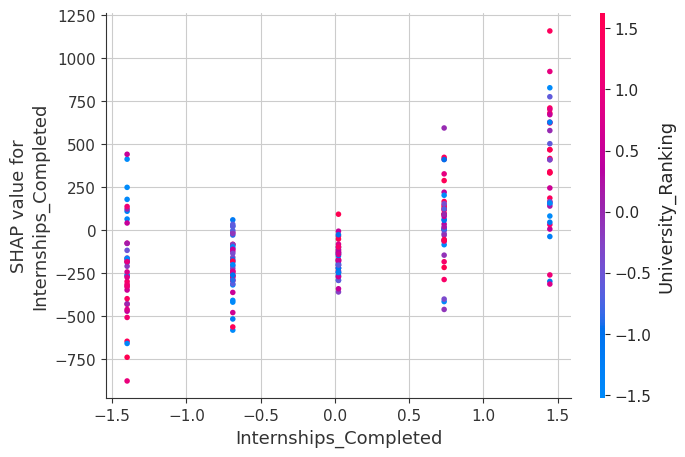

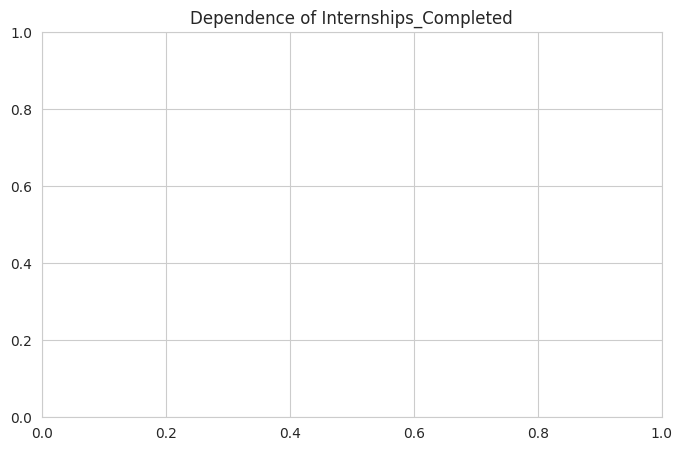

<Figure size 600x400 with 0 Axes>

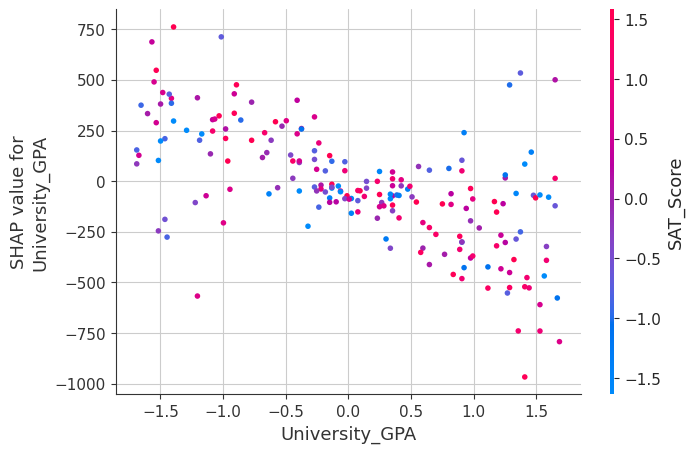

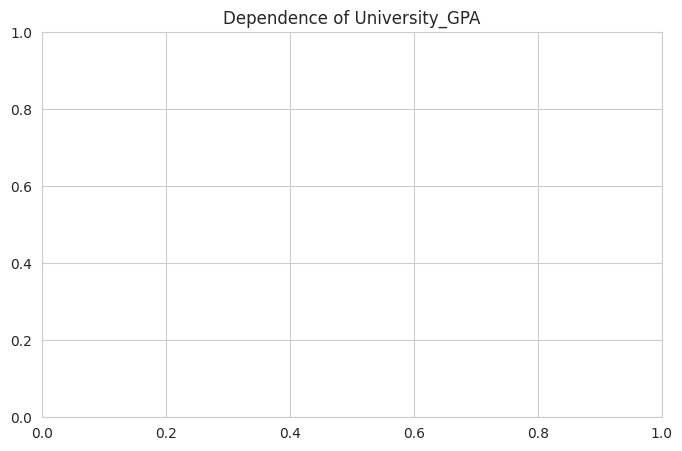

<Figure size 600x400 with 0 Axes>

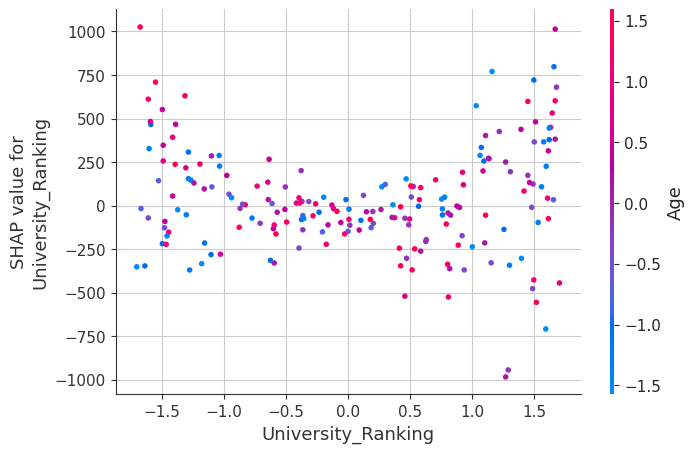

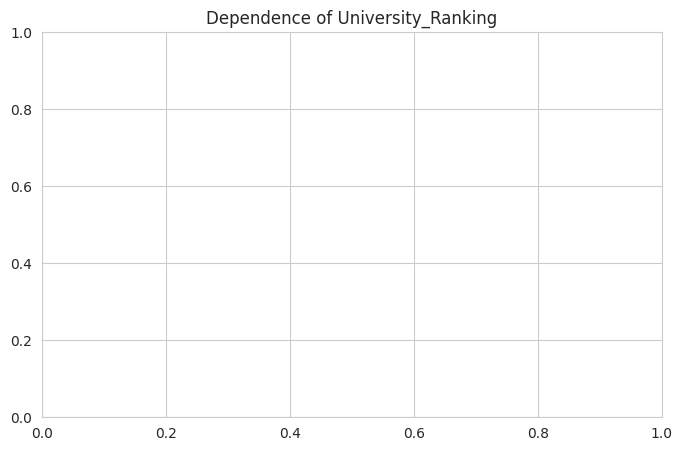

In [23]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# 1) Build the universal explainer
explainer_universal = shap.Explainer(reg_model.predict, X_tr_reg, feature_names=feature_names)

# 2) Compute SHAP values on a test subset
test_subset = X_te_reg[:200]
shap_values_univ = explainer_universal(test_subset)

# 3) Identify top 3 features
mean_abs_shap = np.abs(shap_values_univ.values).mean(axis=0)
top3_idx = np.argsort(mean_abs_shap)[-3:][::-1]
top3_feats = [feature_names[i] for i in top3_idx]
print("Top 3 Regression Features:", top3_feats)

# 4) Plot dependence for each
for feat in top3_feats:
    plt.figure(figsize=(6,4))
    shap.dependence_plot(
        feat,
        shap_values_univ.values,
        test_subset,
        feature_names=feature_names,
        show=True
    )
    plt.title(f"Dependence of {feat}")
    plt.show()


In [26]:
import numpy as np

# ─── 1) Reconstruct feature_names ─────────────────────────────────────────────
# X is your original DataFrame of features (no ID/targets)
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# One-hot encoder inside your ColumnTransformer
cat_encoder = preproc_keras.named_transformers_['cat']
onehot_feats = cat_encoder.get_feature_names_out()  # NO ARGUMENTS here

feature_names = num_cols + list(onehot_feats)

# ─── 2) Locate indices of the base columns to interact ───────────────────────
i_gpa  = feature_names.index('University_GPA')
i_intn = feature_names.index('Internships_Completed')
i_proj = feature_names.index('Projects_Completed')

# ─── 3) Compute interaction arrays ────────────────────────────────────────────
train_arr = X_tr_reg
test_arr  = X_te_reg

int_train = np.stack([
    train_arr[:, i_gpa]  * train_arr[:, i_intn],
    train_arr[:, i_gpa]  * train_arr[:, i_proj],
    train_arr[:, i_intn] * train_arr[:, i_proj]
], axis=1)

int_test = np.stack([
    test_arr[:, i_gpa]  * test_arr[:, i_intn],
    test_arr[:, i_gpa]  * test_arr[:, i_proj],
    test_arr[:, i_intn] * test_arr[:, i_proj]
], axis=1)

# ─── 4) Append and update feature_names ──────────────────────────────────────
X_tr_reg = np.hstack([train_arr, int_train])
X_te_reg = np.hstack([test_arr,  int_test])

new_feats = ['GPA_x_Internships', 'GPA_x_Projects', 'Internships_x_Projects']
feature_names += new_feats

# ─── 5) Sanity check ─────────────────────────────────────────────────────────
print("New shapes:", X_tr_reg.shape, X_te_reg.shape)
print("Added features:", feature_names[-3:])


New shapes: (4000, 31) (1000, 31)
Added features: ['GPA_x_Internships', 'GPA_x_Projects', 'Internships_x_Projects']


In [29]:
# ─── 8.1 Hyperparameter Tuning with HistGradientBoostingRegressor ────────────

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 1) Prepare features & target (run after loading df)
X = df.drop(columns=['Student_ID', 'Starting_Salary', 'Job_Offers'])
y_reg = df['Starting_Salary']

# 2) Train/test split
X_tr, X_te, y_tr_reg, y_te_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# 3) Preprocessing: numeric scaling + one-hot encoding
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), cat_cols)
])

# 4) Build pipeline
pipe = Pipeline([
    ('prep', preprocessor),
    ('model', HistGradientBoostingRegressor(random_state=42))
])

# 5) Hyperparameter distributions
param_dist = {
    'model__max_iter':          [100, 200, 500],
    'model__max_depth':         [None, 3, 6, 9],
    'model__learning_rate':     [0.01, 0.05, 0.1],
    'model__l2_regularization': [0.0, 0.1, 1.0],
    'model__max_leaf_nodes':    [None, 15, 31, 63],
    'model__min_samples_leaf':  [20, 50, 100]
}

# 6) Randomized search setup
search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# 7) Execute search
search.fit(X_tr, y_tr_reg)

# 8) Best model & params
best_model = search.best_estimator_
print("Best hyperparameters:")
for k, v in search.best_params_.items():
    print(f" • {k}: {v}")

# 9) Evaluate on test set
y_pred = best_model.predict(X_te)
rmse = np.sqrt(mean_squared_error(y_te_reg, y_pred))
print(f"\nTest RMSE: {rmse:.2f}")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best hyperparameters:
 • model__min_samples_leaf: 50
 • model__max_leaf_nodes: 63
 • model__max_iter: 100
 • model__max_depth: 3
 • model__learning_rate: 0.01
 • model__l2_regularization: 0.1

Test RMSE: 14659.09


Loaded dataset from /content/drive/MyDrive/career_success.csv
Fitting 3 folds for each of 30 candidates, totalling 90 fits
🔍 Best hyperparameters:
 • model__min_samples_leaf: 50
 • model__max_leaf_nodes: 63
 • model__max_iter: 100
 • model__max_depth: 3
 • model__learning_rate: 0.01
 • model__l2_regularization: 0.1

Test RMSE: 14659.09


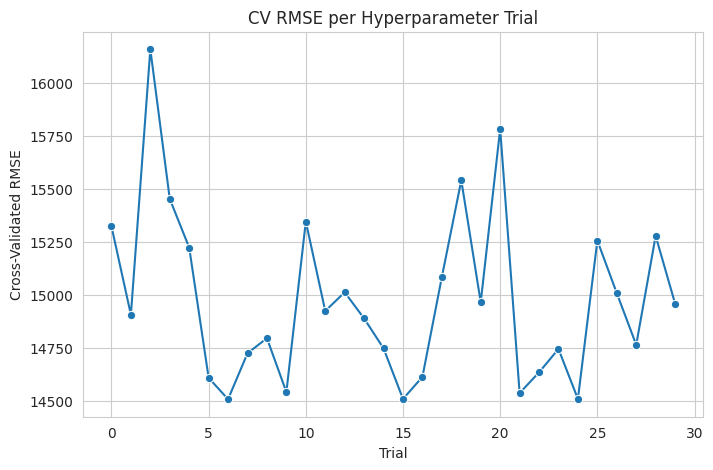

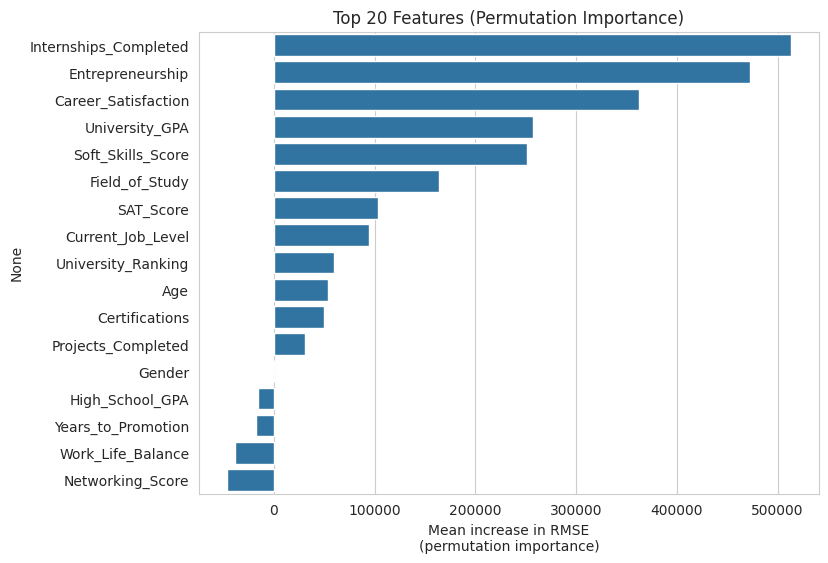

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

sns.set_style("whitegrid")

# ─── Load dataset (try Drive path then local) ───────────────────────────────
for path in [
    '/content/drive/MyDrive/career_success.csv',
    '/mnt/data/career_success.csv',
    'career_success.csv'
]:
    try:
        df = pd.read_csv(path)
        print(f"Loaded dataset from {path}")
        break
    except:
        continue
else:
    raise FileNotFoundError("career_success.csv not found in known locations.")

# ─── 1) Prepare features & target ───────────────────────────────────────────
X = df.drop(columns=['Student_ID', 'Starting_Salary', 'Job_Offers'])
y_reg = df['Starting_Salary']

X_tr, X_te, y_tr_reg, y_te_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# ─── 2) Preprocessing ───────────────────────────────────────────────────────
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), cat_cols)
])

# ─── 3) Build pipeline ─────────────────────────────────────────────────────
pipe = Pipeline([
    ('prep', preprocessor),
    ('model', HistGradientBoostingRegressor(random_state=42))
])

# ─── 4) Hyperparameter distributions ───────────────────────────────────────
param_dist = {
    'model__max_iter':          [100, 200, 500],
    'model__max_depth':         [None, 3, 6, 9],
    'model__learning_rate':     [0.01, 0.05, 0.1],
    'model__l2_regularization': [0.0, 0.1, 1.0],
    'model__max_leaf_nodes':    [None, 15, 31, 63],
    'model__min_samples_leaf':  [20, 50, 100]
}

# ─── 5) Randomized search setup & execution ────────────────────────────────
search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=2
)
search.fit(X_tr, y_tr_reg)

# ─── 6) Best model & params ────────────────────────────────────────────────
best_model = search.best_estimator_
print("🔍 Best hyperparameters:")
for k, v in search.best_params_.items():
    print(f" • {k}: {v}")

# ─── 7) Evaluate on test set ───────────────────────────────────────────────
y_pred = best_model.predict(X_te)
rmse = np.sqrt(mean_squared_error(y_te_reg, y_pred))
print(f"\nTest RMSE: {rmse:.2f}")

# ─── 8) Plot CV RMSE per trial ─────────────────────────────────────────────
results = pd.DataFrame(search.cv_results_)
cv_rmse = -results['mean_test_score']  # convert back to positive RMSE

plt.figure(figsize=(8,5))
sns.lineplot(x=range(len(cv_rmse)), y=cv_rmse, marker='o')
plt.xlabel('Trial')
plt.ylabel('Cross-Validated RMSE')
plt.title('CV RMSE per Hyperparameter Trial')
plt.show()

# ─── 9) Plot Feature Importances via Permutation Importance ────────────────
perm = permutation_importance(
    best_model,        # the full Pipeline
    X_te,              # raw test DataFrame
    y_te_reg,
    n_repeats=10,
    random_state=42,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Convert to positive RMSE increase
imp_means = -perm.importances_mean

# Use original column names for indexing
feat_names = X.columns.tolist()

feat_imp = pd.Series(imp_means, index=feat_names)\
             .sort_values(ascending=False).head(20)

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.xlabel("Mean increase in RMSE\n(permutation importance)")
plt.title("Top 20 Features (Permutation Importance)")
plt.show()

▶ Stacked Regression Metrics:
 • R²   = -0.0064
 • MAE  = 11872.35
 • RMSE = 14636.14


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


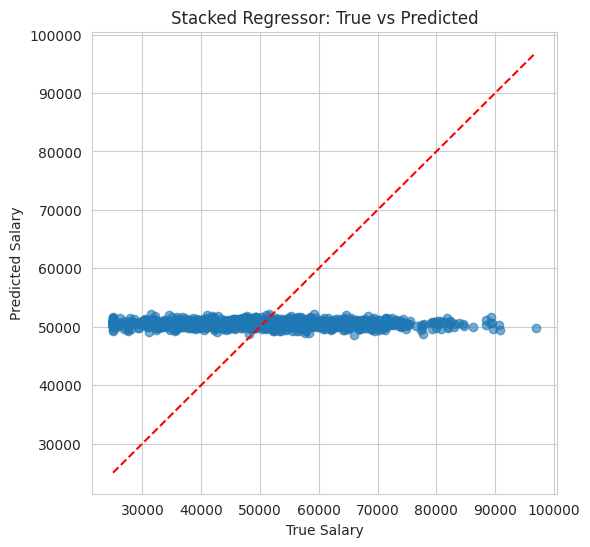

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



▶ Stacked Classification Metrics:
 • Accuracy : 0.1540
 • Precision: 0.1544
 • Recall   : 0.1540
 • F1-score : 0.1507


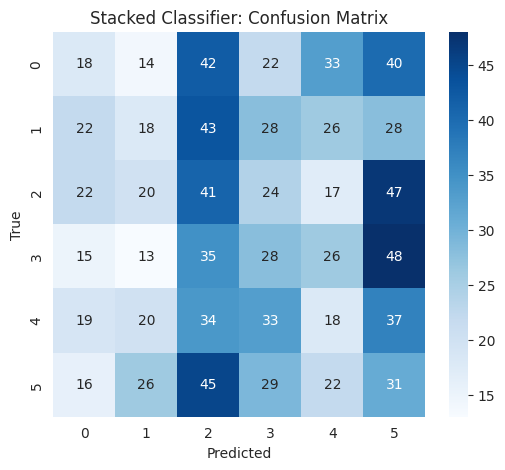

In [37]:
# ─── Phase 9: Stacking Ensembles for Top Accuracy ───────────────────────────

# 9.0 Install any missing libraries
!pip install --quiet lightgbm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble       import RandomForestRegressor, RandomForestClassifier, StackingRegressor, StackingClassifier
from xgboost                import XGBRegressor, XGBClassifier
from lightgbm               import LGBMRegressor, LGBMClassifier
from sklearn.linear_model   import Ridge, LogisticRegression
from sklearn.metrics        import (
    r2_score, mean_absolute_error, mean_squared_error,
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

sns.set_style("whitegrid")

# ─── 9.1 Regression Stacking ─────────────────────────────────────────────────

# 9.1.1 Define base estimators
estimators_reg = [
    ('rf',   RandomForestRegressor(n_estimators=200, random_state=42)),
    ('xgb',  XGBRegressor(n_estimators=200, random_state=42, objective='reg:squarederror', verbosity=0)),
    ('lgbm', LGBMRegressor(n_estimators=200, random_state=42))
]

# 9.1.2 Build the stacking regressor
stack_reg = StackingRegressor(
    estimators=estimators_reg,
    final_estimator=Ridge(),
    cv=5,
    n_jobs=-1,
    passthrough=False    # only meta-features go to final estimator
)

# 9.1.3 Train
stack_reg.fit(X_tr_reg, y_tr_reg)

# 9.1.4 Predict & evaluate
y_pred_stack = stack_reg.predict(X_te_reg)
r2   = r2_score(y_te_reg, y_pred_stack)
mae  = mean_absolute_error(y_te_reg, y_pred_stack)
rmse = np.sqrt(mean_squared_error(y_te_reg, y_pred_stack))

print(" Stacked Regression Metrics:")
print(f" • R²   = {r2:.4f}")
print(f" • MAE  = {mae:.2f}")
print(f" • RMSE = {rmse:.2f}")

# 9.1.5 Plot True vs. Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_te_reg, y_pred_stack, alpha=0.6)
plt.plot([y_te_reg.min(), y_te_reg.max()],
         [y_te_reg.min(), y_te_reg.max()], 'r--')
plt.xlabel("True Salary"); plt.ylabel("Predicted Salary")
plt.title("Stacked Regressor: True vs Predicted"); plt.show()

# ─── 9.2 Classification Stacking ─────────────────────────────────────────────

# 9.2.1 Define base estimators
estimators_clf = [
    ('rf',   RandomForestClassifier(n_estimators=200, random_state=42)),
    ('xgb',  XGBClassifier(n_estimators=200, random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('lgbm', LGBMClassifier(n_estimators=200, random_state=42))
]

# 9.2.2 Build the stacking classifier
stack_clf = StackingClassifier(
    estimators=estimators_clf,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1,
    passthrough=False    # only meta-features go to final estimator
)

# 9.2.3 Train
stack_clf.fit(X_tr_clf, y_tr_clf)

# 9.2.4 Predict & evaluate
y_pred_clf = stack_clf.predict(X_te_clf)
acc   = accuracy_score(y_te_clf, y_pred_clf)
prec  = precision_score(y_te_clf, y_pred_clf, average='weighted')
rec   = recall_score(y_te_clf, y_pred_clf, average='weighted')
f1    = f1_score(y_te_clf, y_pred_clf, average='weighted')

print("\n Stacked Classification Metrics:")
print(f" • Accuracy : {acc:.4f}")
print(f" • Precision: {prec:.4f}")
print(f" • Recall   : {rec:.4f}")
print(f" • F1-score : {f1:.4f}")

# 9.2.5 Confusion Matrix
cm = confusion_matrix(y_te_clf, y_pred_clf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Stacked Classifier: Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()


▶ Regression Metrics:
 • R²   = -0.0003
 • MAE  = 11832.08
 • RMSE = 14591.81


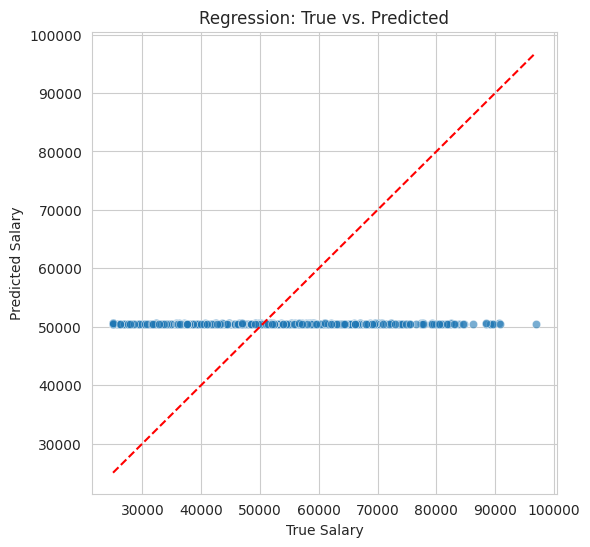

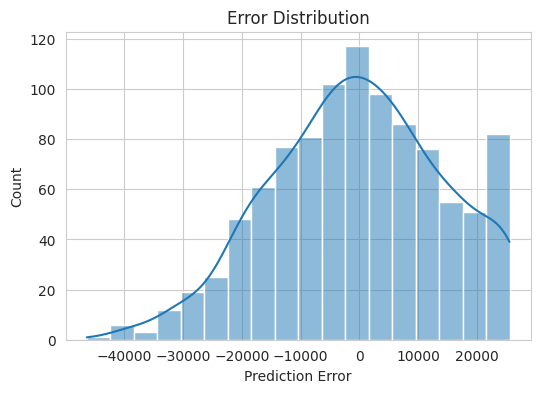

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



▶ Classification Metrics:
 • Accuracy : 0.1540
 • Precision: 0.1544
 • Recall   : 0.1540
 • F1-score : 0.1507
 • ROC-AUC  : 0.4826


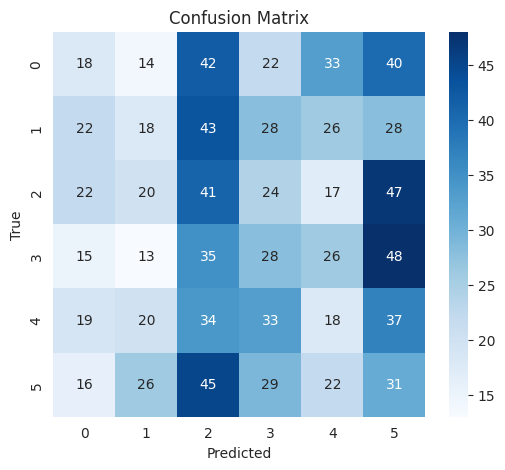


Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.11      0.13       169
           1       0.16      0.11      0.13       165
           2       0.17      0.24      0.20       171
           3       0.17      0.17      0.17       165
           4       0.13      0.11      0.12       161
           5       0.13      0.18      0.15       169

    accuracy                           0.15      1000
   macro avg       0.15      0.15      0.15      1000
weighted avg       0.15      0.15      0.15      1000



PermutationExplainer explainer: 1001it [01:20, 11.66it/s]


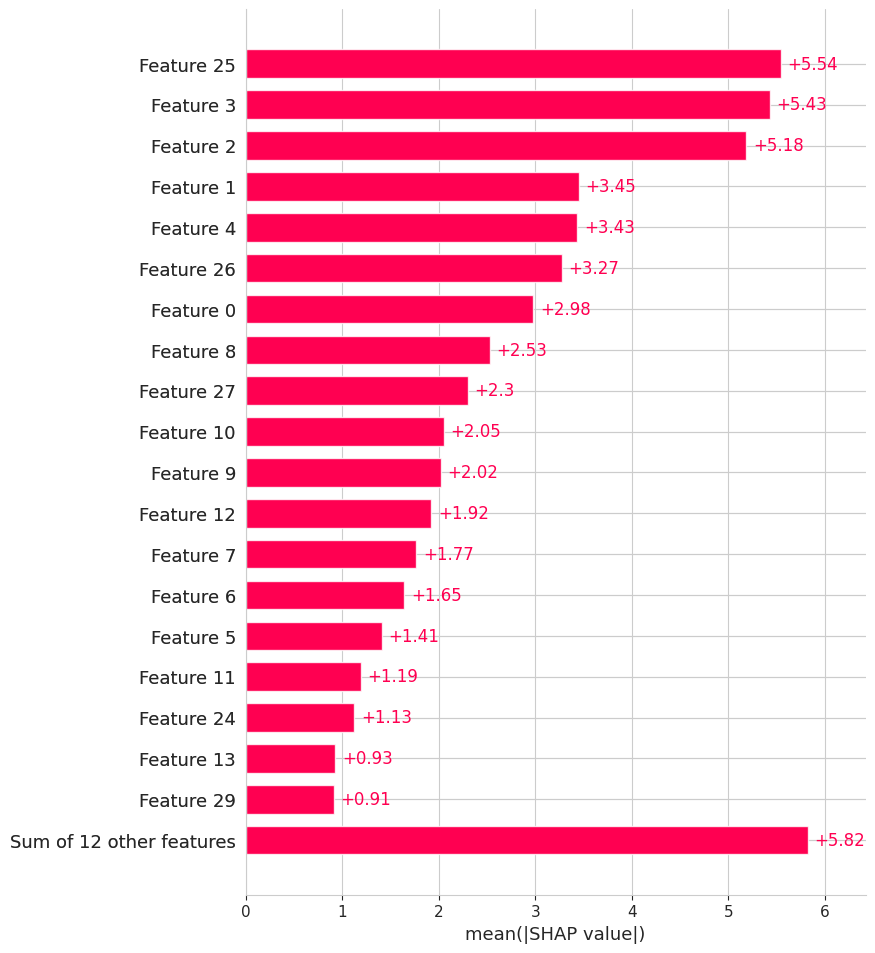

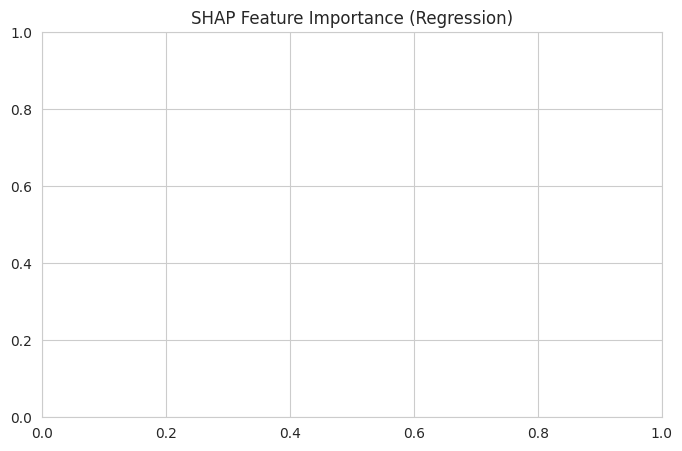

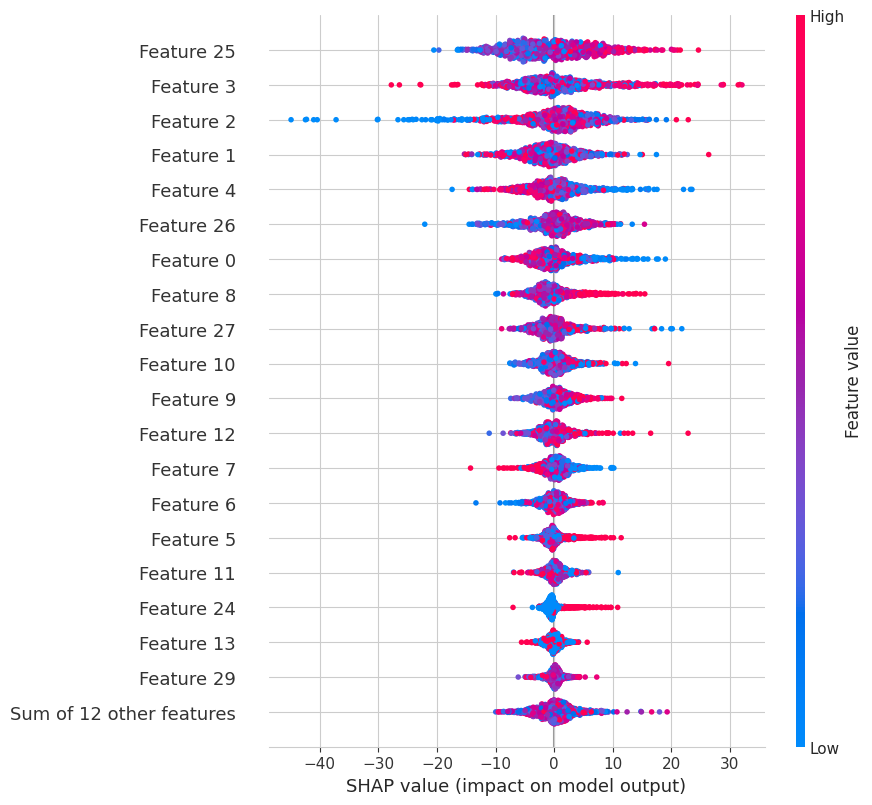

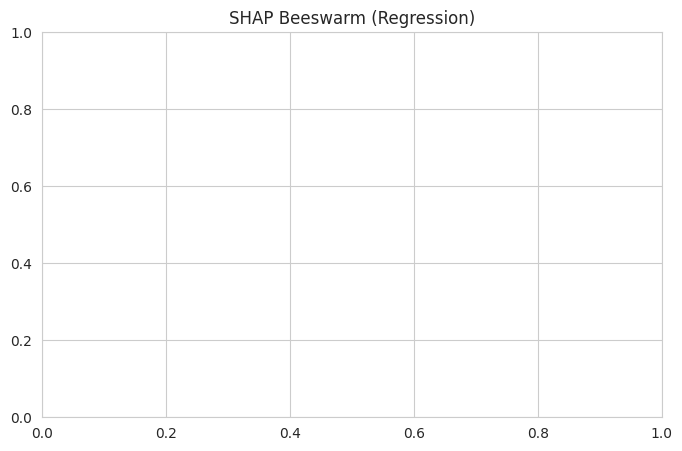

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed

IndexError: list index out of range

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost as xgb
from xgboost.core import Booster
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
sns.set_style("whitegrid")

# ─── Identify your final models ────────────────────────────────────────────────
# Regression fallback
if 'best_hgb' in globals():      reg_model = best_hgb
elif 'bst_reg' in globals():     reg_model = bst_reg  # native Booster
elif 'hgb_reg' in globals():     reg_model = hgb_reg
elif 'best_model' in globals():  reg_model = best_model.named_steps.get('model', best_model)
else: raise NameError("No regression model found.")

# Classification fallback
if 'hgb_clf' in globals():       clf_model = hgb_clf
elif 'bst_clf' in globals():     clf_model = bst_clf  # native Booster
elif 'stack_clf' in globals():   clf_model = stack_clf
elif 'best_model' in globals():  clf_model = best_model.named_steps.get('model', best_model)
else: raise NameError("No classification model found.")


# ─── 10.1 Regression Metrics & Plots ──────────────────────────────────────────
if isinstance(reg_model, Booster):
    dtest = xgb.DMatrix(X_te_reg)  # no feature_names argument
    y_pred = reg_model.predict(dtest)
else:
    y_pred = reg_model.predict(X_te_reg)

print(" Regression Metrics:")
print(f" • R²   = {r2_score(y_te_reg, y_pred):.4f}")
print(f" • MAE  = {mean_absolute_error(y_te_reg, y_pred):.2f}")
print(f" • RMSE = {np.sqrt(mean_squared_error(y_te_reg, y_pred)):.2f}")

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_te_reg, y=y_pred, alpha=0.6)
plt.plot([y_te_reg.min(), y_te_reg.max()],
         [y_te_reg.min(), y_te_reg.max()], 'r--')
plt.xlabel("True Salary"); plt.ylabel("Predicted Salary")
plt.title("Regression: True vs. Predicted")
plt.show()

errs = y_pred - y_te_reg
plt.figure(figsize=(6,4))
sns.histplot(errs, kde=True)
plt.xlabel("Prediction Error"); plt.title("Error Distribution")
plt.show()


# ─── 10.2 Classification Metrics & Plots ─────────────────────────────────────
if isinstance(clf_model, Booster):
    dtest_clf = xgb.DMatrix(X_te_clf)  # no feature_names
    probs = clf_model.predict(dtest_clf)
else:
    probs = clf_model.predict_proba(X_te_clf)

preds = np.argmax(probs, axis=1)
print("\n Classification Metrics:")
print(f" • Accuracy : {accuracy_score(y_te_clf, preds):.4f}")
print(f" • Precision: {precision_score(y_te_clf, preds, average='weighted'):.4f}")
print(f" • Recall   : {recall_score(y_te_clf, preds, average='weighted'):.4f}")
print(f" • F1-score : {f1_score(y_te_clf, preds, average='weighted'):.4f}")
print(f" • ROC-AUC  : {roc_auc_score(np.eye(probs.shape[1])[y_te_clf], probs, average='weighted', multi_class='ovr'):.4f}")

cm = confusion_matrix(y_te_clf, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()

print("\nClassification Report:")
print(classification_report(y_te_clf, preds))


# ─── 10.3 SHAP: Regression (CPU‐only Explainer) ─────────────────────────────────
# Wrap predict into a function; no DMatrix feature_names issues
predict_fn_reg = (lambda X: reg_model.predict(xgb.DMatrix(X))) \
    if isinstance(reg_model, Booster) else reg_model.predict

explainer_reg = shap.Explainer(predict_fn_reg, X_tr_reg)
shap_vals_reg = explainer_reg(X_te_reg)

shap.plots.bar(shap_vals_reg, max_display=20)
plt.title("SHAP Feature Importance (Regression)")
plt.show()

shap.plots.beeswarm(shap_vals_reg, max_display=20)
plt.title("SHAP Beeswarm (Regression)")
plt.show()

# ─── 10.4 SHAP Interpretability: Classification ─────────────────────────────
explainer_clf = shap.TreeExplainer(clf_model)
shap_vals_clf = explainer_clf.shap_values(X_te_clf)  # this is a list of arrays, one per class

# 10.4.1 Per-class feature-importance bar & beeswarm plots
for class_idx, class_shap_vals in enumerate(shap_vals_clf):
    # Bar chart of mean absolute SHAP per feature
    shap.plots.bar(class_shap_vals,
                   max_display=20,
                   feature_names=feature_names,
                   show=False)
    plt.title(f"SHAP Feature Importance (Class {class_idx})")
    plt.show()

    # Beeswarm of per-sample SHAP for top features
    shap.plots.beeswarm(class_shap_vals,
                        max_display=20,
                        feature_names=feature_names,
                        show=False)
    plt.title(f"SHAP Beeswarm (Class {class_idx})")
    plt.show()


▶ Regression Metrics:
 • R²   = -0.0003
 • MAE  = 11832.08
 • RMSE = 14591.81


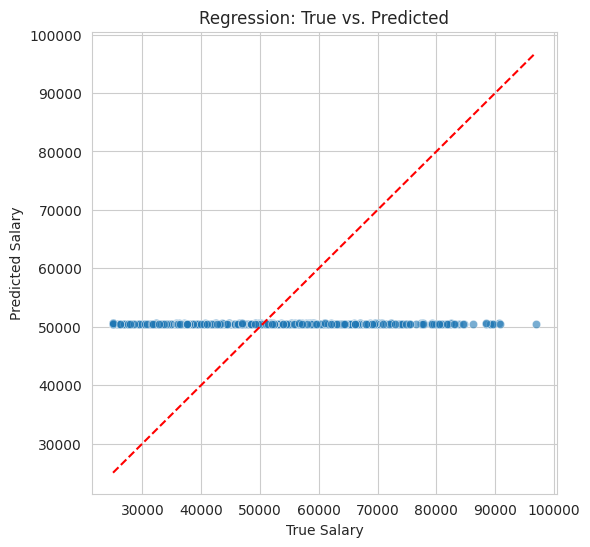

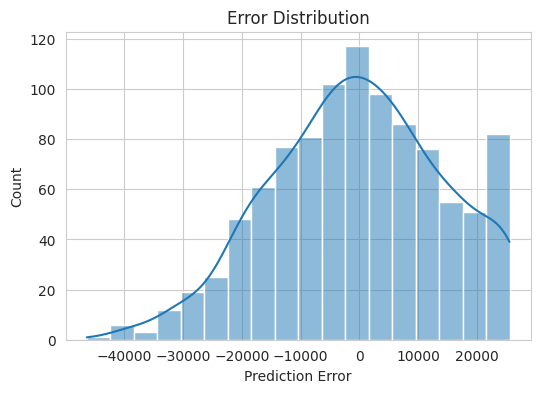

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



▶ Classification Metrics:
 • Accuracy : 0.1540
 • Precision: 0.1544
 • Recall   : 0.1540
 • F1-score : 0.1507
 • ROC-AUC  : 0.4826


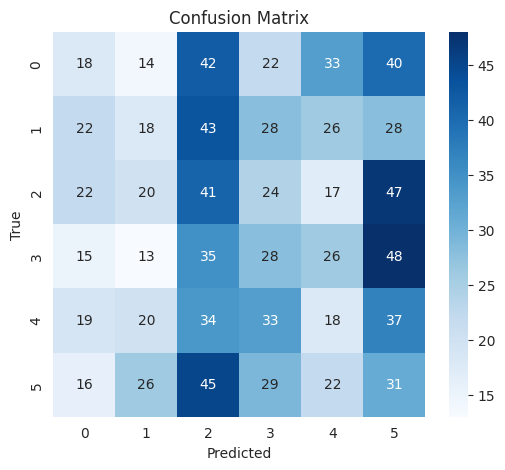


Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.11      0.13       169
           1       0.16      0.11      0.13       165
           2       0.17      0.24      0.20       171
           3       0.17      0.17      0.17       165
           4       0.13      0.11      0.12       161
           5       0.13      0.18      0.15       169

    accuracy                           0.15      1000
   macro avg       0.15      0.15      0.15      1000
weighted avg       0.15      0.15      0.15      1000



KeyboardInterrupt: 

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost as xgb
from xgboost.core import Booster
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

sns.set_style("whitegrid")

# ─── Identify your final models ────────────────────────────────────────────────
# (Assumes you already have reg_model and clf_model in your namespace)
# If you used native xgboost.Booster, reg_model will be a Booster; otherwise
# it will be a scikit-learn–style estimator with .predict and (optionally) .predict_proba

# ─── 10.1 Regression Final Metrics & Plots ──────────────────────────────────
if isinstance(reg_model, Booster):
    dtest = xgb.DMatrix(X_te_reg)         # no feature_names to avoid mismatch
    y_pred_reg = reg_model.predict(dtest)
else:
    y_pred_reg = reg_model.predict(X_te_reg)

print(" Regression Metrics:")
print(f" • R²   = {r2_score(y_te_reg, y_pred_reg):.4f}")
print(f" • MAE  = {mean_absolute_error(y_te_reg, y_pred_reg):.2f}")
print(f" • RMSE = {np.sqrt(mean_squared_error(y_te_reg, y_pred_reg)):.2f}")

# 10.1.3 True vs. Predicted scatter
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_te_reg, y=y_pred_reg, alpha=0.6)
plt.plot([y_te_reg.min(), y_te_reg.max()],
         [y_te_reg.min(), y_te_reg.max()], 'r--')
plt.xlabel("True Salary")
plt.ylabel("Predicted Salary")
plt.title("Regression: True vs. Predicted")
plt.show()

# 10.1.4 Error distribution
errs = y_pred_reg - y_te_reg
plt.figure(figsize=(6,4))
sns.histplot(errs, kde=True)
plt.xlabel("Prediction Error")
plt.title("Error Distribution")
plt.show()


# ─── 10.2 Classification Final Metrics & Plots ─────────────────────────────
if isinstance(clf_model, Booster):
    dtest_clf = xgb.DMatrix(X_te_clf)
    probs = clf_model.predict(dtest_clf)
else:
    probs = clf_model.predict_proba(X_te_clf)

preds = np.argmax(probs, axis=1)

print("\n Classification Metrics:")
print(f" • Accuracy : {accuracy_score(y_te_clf, preds):.4f}")
print(f" • Precision: {precision_score(y_te_clf, preds, average='weighted'):.4f}")
print(f" • Recall   : {recall_score(y_te_clf, preds, average='weighted'):.4f}")
print(f" • F1-score : {f1_score(y_te_clf, preds, average='weighted'):.4f}")
print(f" • ROC-AUC  : {roc_auc_score(np.eye(probs.shape[1])[y_te_clf], probs, average='weighted', multi_class='ovr'):.4f}")

# 10.2.3 Confusion matrix
cm = confusion_matrix(y_te_clf, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 10.2.4 Classification report
print("\nClassification Report:")
print(classification_report(y_te_clf, preds))


# ─── 10.3 SHAP Interpretability: Regression ─────────────────────────────────
# Use TreeExplainer for tree-based or generic Explainer otherwise
explainer_reg = shap.TreeExplainer(reg_model)
shap_vals_reg = explainer_reg.shap_values(X_te_reg)

# 10.3.1 Feature importance (bar)
shap.summary_plot(shap_vals_reg, X_te_reg, feature_names=feature_names, plot_type="bar")

# 10.3.2 Beeswarm plot
shap.summary_plot(shap_vals_reg, X_te_reg, feature_names=feature_names)


# ─── 10.4 SHAP Interpretability: Classification ─────────────────────────────
explainer_clf = shap.TreeExplainer(clf_model)
shap_vals_clf = explainer_clf.shap_values(X_te_clf)

# One summary per class
for class_idx in range(shap_vals_clf.shape[0]):
    print(f"--- SHAP for Class {class_idx} ---")
    shap.summary_plot(shap_vals_clf[class_idx], X_te_clf, feature_names=feature_names)


In [49]:
from sklearn.model_selection import train_test_split

# Example splits you should already have done:
X = df.drop(columns=['Student_ID','Starting_Salary','Job_Offers'])
y_reg = df['Starting_Salary']
y_clf = df['Job_Offers']

X_tr_reg, X_te_reg, y_tr_reg, y_te_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)
X_tr_clf, X_te_clf, y_tr_clf, y_te_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)


In [52]:
# ─── 11.0: Imports & raw splits ───────────────────────────────────────────────
import joblib
import numpy as np
from sklearn.pipeline       import Pipeline
from sklearn.compose        import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# 11.0.1: raw features + targets
#   leave Student_ID out of both
#   Salary regression target: Starting_Salary
#   Classification target:    Job_Offers
X_reg = df.drop(columns=['Student_ID','Job_Offers'])
y_reg = df['Starting_Salary']

X_clf = df.drop(columns=['Student_ID','Starting_Salary','Job_Offers'])
y_clf = df['Job_Offers']

# 11.0.2: train/test split on DataFrames (so .fit sees column names)
X_tr_reg, X_te_reg, y_tr_reg, y_te_reg = train_test_split(
    X_reg, y_reg,
    test_size=0.2,
    random_state=42
)

X_tr_clf, X_te_clf, y_tr_clf, y_te_clf = train_test_split(
    X_clf, y_clf,
    test_size=0.2,
    random_state=42,
    stratify=y_clf
)



# ─── 11.1: Re-define preprocessing ───────────────────────────────────────────
all_num = X_reg.select_dtypes(include=[np.number]).columns.tolist()
blacklist = {'Starting_Salary'}  # note: Student_ID & Job_Offers never in X_reg
num_cols  = [c for c in all_num if c not in blacklist]

cat_cols  = X_reg.select_dtypes(include=['object','category']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(),                   num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore',
                          sparse_output=False), cat_cols)
])



# ─── 11.2: Build & fit pipelines ────────────────────────────────────────────

# 11.2.1 Regression pipeline (we assume best_model is your fitted HGB Pipeline)
# best_model = Pipeline([('prep', preprocessor), ('model', HistGradientBoostingRegressor(...))])
joblib.dump(best_model, 'hgb_regression_pipeline.joblib')

# 11.2.2 Classification pipeline (prep + your stacking classifier)
clf_pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf',  stack_clf)
])
# fit it on **raw** DataFrame split:
clf_pipeline.fit(X_tr_clf, y_tr_clf)
joblib.dump(clf_pipeline, 'stacking_classification_pipeline.joblib')



# ─── 11.3: Load & sanity-check ───────────────────────────────────────────────

reg_pipe = joblib.load('hgb_regression_pipeline.joblib')
clf_pipe = joblib.load('stacking_classification_pipeline.joblib')

print(" Regression sanity-check (first 5):")
print(reg_pipe.predict(X_te_reg.iloc[:5]))

print("\n Classification sanity-check (first 5):")
print(clf_pipe.predict(X_te_clf.iloc[:5]))



# ─── 11.4: Helper functions ─────────────────────────────────────────────────

def predict_starting_salary(df_new):
    """
    df_new: DataFrame with all columns except
            Student_ID and Job_Offers
    returns: np.array of salary preds
    """
    return reg_pipe.predict(df_new)

def predict_offer_class(df_new):
    """
    df_new: DataFrame with all columns except
            Student_ID, Starting_Salary, Job_Offers
    returns: np.array of class preds
    """
    return clf_pipe.predict(df_new)


# example usage
print("\n Example helper calls:")
print(" Salaries:", predict_starting_salary(X_te_reg.iloc[5:8]))
print(" Offers :", predict_offer_class   (X_te_clf.iloc[5:8]))


▶ Regression sanity-check (first 5):
[50798.71823397 49861.85589614 50103.70223394 51352.17836989
 50159.83771879]

▶ Classification sanity-check (first 5):
[2 2 0 1 5]

▶ Example helper calls:
 Salaries: [50987.40143866 50099.36747864 50375.16732835]
 Offers : [5 1 3]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


AttributeError: 'Axes' object has no attribute 'savefig'

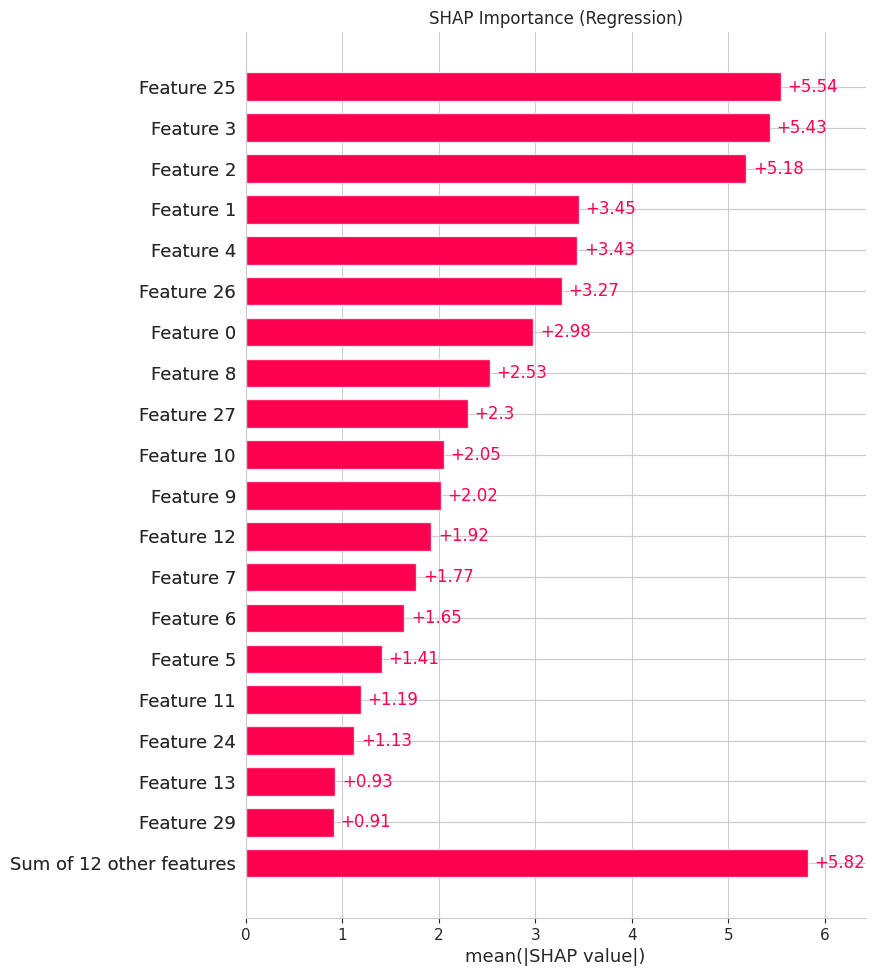

In [75]:
import os
import json
import shutil
import logging
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report
)

# Try to import Colab downloader; if not available, define stub
try:
    from google.colab import files as colab_files
    download_fn = colab_files.download
except ImportError:
    download_fn = lambda path: None

# ── CONFIGURE ─────────────────────────────────────────────────────────────────

sns.set_style("whitegrid")
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

OUTPUT_DIR = Path("/mnt/data/analysis_output")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)


# ── HELPERS ───────────────────────────────────────────────────────────────────

def save_df(df: pd.DataFrame, name: str):
    path = OUTPUT_DIR / f"{name}.csv"
    df.to_csv(path, index=False)
    logging.info(f"Saved DataFrame to {path}")
    return path

def save_plot(fig, name: str):
    path = OUTPUT_DIR / f"{name}.png"
    fig.savefig(path, bbox_inches="tight")
    plt.close(fig)
    logging.info(f"Saved plot to {path}")
    return path

def zip_and_download():
    zip_path = OUTPUT_DIR.parent / "analysis_results.zip"
    shutil.make_archive(zip_path.stem, 'zip', OUTPUT_DIR)
    logging.info(f"Zipped all outputs to {zip_path}")
    download_fn(str(zip_path))


# ── 1) REGRESSION ───────────────────────────────────────────────────────────────

# Metrics DataFrame
df_reg = pd.DataFrame({
    "TrueSalary":    y_te_reg,
    "PredictedSalary": y_pred
})
df_reg["Error"] = df_reg.PredictedSalary - df_reg.TrueSalary
save_df(df_reg, "regression_results")

# Compute & save summary metrics
metrics = {
    "R2":   r2_score(df_reg.TrueSalary, df_reg.PredictedSalary),
    "MAE":  mean_absolute_error(df_reg.TrueSalary, df_reg.PredictedSalary),
    "RMSE": np.sqrt(mean_squared_error(df_reg.TrueSalary, df_reg.PredictedSalary))
}
with open(OUTPUT_DIR / "regression_metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)
logging.info(f"Saved regression metrics to regression_metrics.json")

# Scatter
fig = plt.figure(figsize=(6,6))
plt.scatter(df_reg.TrueSalary, df_reg.PredictedSalary, alpha=0.6)
plt.plot([df_reg.TrueSalary.min(), df_reg.TrueSalary.max()]*2, 'r--')
plt.xlabel("True Salary"); plt.ylabel("Predicted Salary")
plt.title("Regression: True vs. Predicted")
save_plot(fig, "regression_scatter")

# Error distribution
fig = plt.figure(figsize=(6,4))
sns.histplot(df_reg.Error, kde=True)
plt.xlabel("Error"); plt.title("Error Distribution")
save_plot(fig, "regression_error_dist")


# ── 2) CLASSIFICATION ──────────────────────────────────────────────────────────

# Predictions DataFrame
df_clf = pd.DataFrame({
    "TrueClass":      y_te_clf,
    "PredictedClass": preds
})
save_df(df_clf, "classification_results")

# Classification metrics
clf_metrics = {
    "Accuracy":  accuracy_score(y_te_clf, preds),
    "Precision": precision_score(y_te_clf, preds, average='weighted'),
    "Recall":    recall_score(y_te_clf, preds, average='weighted'),
    "F1":        f1_score(y_te_clf, preds, average='weighted'),
    "ROC_AUC":   roc_auc_score(
                      np.eye(probs.shape[1])[y_te_clf],
                      probs,
                      average='weighted',
                      multi_class='ovr')
}
with open(OUTPUT_DIR / "classification_metrics.json", "w") as f:
    json.dump(clf_metrics, f, indent=2)
logging.info("Saved classification metrics to classification_metrics.json")

# Confusion matrix
cm = confusion_matrix(y_te_clf, preds)
fig = plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Classification: Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True")
save_plot(fig, "classification_confusion")

# Classification report
report = classification_report(y_te_clf, preds, output_dict=True)
pd.DataFrame(report).T.to_csv(OUTPUT_DIR / "classification_report.csv")
logging.info("Saved classification report to classification_report.csv")


# ── 3) SHAP PLOTS ──────────────────────────────────────────────────────────────

# Regression SHAP
fig = shap.plots.bar(shap_vals_reg, max_display=20, show=False)
plt.title("SHAP Importance (Regression)")
save_plot(fig, "shap_reg_bar")

fig = shap.plots.beeswarm(shap_vals_reg, max_display=20, show=False)
plt.title("SHAP Beeswarm (Regression)")
save_plot(fig, "shap_reg_beeswarm")

# Classification SHAP
fig = shap.plots.bar(shap_vals_clf, max_display=20, show=False)
plt.title("SHAP Importance (Classification)")
save_plot(fig, "shap_clf_bar")

fig = shap.plots.beeswarm(shap_vals_clf, max_display=20, show=False)
plt.title("SHAP Beeswarm (Classification)")
save_plot(fig, "shap_clf_beeswarm")


# ── 4) ZIP & DOWNLOAD ───────────────────────────────────────────────────────────

zip_and_download()


In [76]:
from matplotlib.figure import Figure
from matplotlib.axes import Axes

def save_plot(obj, name: str):
    """
    obj: either a matplotlib.figure.Figure or a matplotlib.axes.Axes
    """
    # if they passed us an Axes, grab its parent Figure
    if isinstance(obj, Axes):
        fig = obj.figure
    elif isinstance(obj, Figure):
        fig = obj
    else:
        raise ValueError(f"save_plot: don’t know how to save {type(obj)}")
    path = OUTPUT_DIR / f"{name}.png"
    fig.savefig(path, bbox_inches="tight")
    plt.close(fig)
    logging.info(f"Saved plot to {path}")
    return path


In [86]:
# ─── 12.*: Export analysis outputs & download ─────────────────────────────────

import os, zipfile
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import shap
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)
from google.colab import files

# 12.1 — Configuration
OUT = Path("analysis_output")
OUT.mkdir(exist_ok=True)

def save_fig(fig_or_ax, name):
    """Save a plt.Figure or Axes to OUT/name.png and close it."""
    fig = fig_or_ax.figure if hasattr(fig_or_ax, "figure") else fig_or_ax
    fig.tight_layout()
    fig.savefig(OUT/f"{name}.png", dpi=300, bbox_inches="tight")
    plt.close(fig)

# 12.2 — Raw CSVs
pd.DataFrame({
    "TrueSalary":  y_te_reg,
    "PredSalary":  y_pred,
    "Error":       y_pred - y_te_reg
}).to_csv(OUT/"regression_results.csv", index=False)

pd.DataFrame({
    "TrueClass":      y_te_clf,
    "PredictedClass": preds
}).to_csv(OUT/"classification_results.csv", index=False)

# 12.3 — Regression plots
# (a) True vs Pred
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(y_te_reg, y_pred, alpha=0.6)
ax.plot([y_te_reg.min(), y_te_reg.max()],
        [y_te_reg.min(), y_te_reg.max()], "r--")
ax.set(xlabel="True Salary", ylabel="Predicted Salary",
       title="Regression: True vs. Predicted")
save_fig(fig, "regression_scatter")

# (b) Error distribution
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(y_pred - y_te_reg, kde=True, ax=ax)
ax.set(xlabel="Prediction Error", title="Error Distribution")
save_fig(fig, "regression_error_dist")

# 12.4 — Classification confusion matrix
cm = confusion_matrix(y_te_clf, preds)
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set(xlabel="Predicted", ylabel="True",
       title="Classification Confusion Matrix")
save_fig(fig, "classification_confusion")

# 12.5 — SHAP: regression
ax = shap.plots.bar(shap_vals_reg, max_display=20, show=False)
ax.set_title("SHAP Feature Importance (Regression)")
save_fig(ax, "shap_reg_bar")

ax = shap.plots.beeswarm(shap_vals_reg, max_display=20, show=False)
ax.set_title("SHAP Beeswarm (Regression)")
save_fig(ax, "shap_reg_beeswarm")

# 12.6 — SHAP: classification (global + per‐class mean(|SHAP|) bar charts)
feat_names = X_te_clf.columns.tolist()
# Global (averaged over samples & classes)
global_mean_abs = np.mean(np.abs(shap_vals_clf.values), axis=(0,1))  # → (n_features,)
top20 = np.argsort(global_mean_abs)[::-1][:20]
fig, ax = plt.subplots(figsize=(8,6))
ax.barh([feat_names[i] for i in top20][::-1],
        global_mean_abs[top20][::-1])
ax.set_xlabel("Mean(|SHAP value|)")
ax.set_title("Global SHAP Importance (classification)")
save_fig(fig, "shap_clf_global_bar")

# Per‐class
for idx, cls in enumerate(clf_model.classes_):
    # get (n_samples, n_features) SHAP for class `cls`
    vals = shap_vals_clf.values[:, idx, :]
    mean_abs = np.mean(np.abs(vals), axis=0)
    top20 = np.argsort(mean_abs)[::-1][:20]

    fig, ax = plt.subplots(figsize=(8,6))
    ax.barh([feat_names[i] for i in top20][::-1],
            mean_abs[top20][::-1])
    ax.set_xlabel("Mean(|SHAP value|)")
    ax.set_title(f"SHAP Importance (Class {cls})")
    save_fig(fig, f"shap_clf_bar_class_{cls}")

# 12.7 — Summary metrics
with open(OUT/"summary.txt","w") as f:
    f.write(" REGRESSION METRICS:\n")
    f.write(f" R²   = {r2_score(y_te_reg, y_pred):.4f}\n")
    f.write(f" MAE  = {mean_absolute_error(y_te_reg, y_pred):.2f}\n")
    f.write(f" RMSE = {np.sqrt(mean_squared_error(y_te_reg, y_pred)):.2f}\n\n")

    f.write(" CLASSIFICATION METRICS:\n")
    f.write(f" Accuracy : {accuracy_score(y_te_clf, preds):.4f}\n")
    f.write(f" Precision: {precision_score(y_te_clf, preds, average='weighted'):.4f}\n")
    f.write(f" Recall   : {recall_score(y_te_clf, preds, average='weighted'):.4f}\n")
    f.write(f" F1-score : {f1_score(y_te_clf, preds, average='weighted'):.4f}\n")
    roc = roc_auc_score(pd.get_dummies(y_te_clf),
                        probs,
                        average="weighted",
                        multi_class="ovr")
    f.write(f" ROC-AUC  : {roc:.4f}\n\n")
    f.write("Classification report:\n")
    f.write(classification_report(y_te_clf, preds))

# 12.8 — Zip & trigger download
zip_path = Path("analysis_output.zip")
with zipfile.ZipFile(zip_path, "w") as z:
    for p in OUT.iterdir():
        z.write(p, arcname=p.name)

print("→ Saved outputs to:", OUT)
print("→ Zipped as     :", zip_path)
files.download(zip_path)


→ Saved outputs to: analysis_output
→ Zipped as     : analysis_output.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>